In [5]:
import pandas as pd
import numpy as np
from onekey_algo import get_param_in_cwd

def get_time_dependent_gt(survival:pd.DataFrame, time, id_col='ID', duration_col='duration', event_col='event'):
    sur = []
    for idx, row in survival.iterrows():
        if row[duration_col] > time:
            sur.append([row['ID'], 0])
        elif row[event_col] == 1:
            sur.append([row['ID'], 1])
    sur = pd.DataFrame(sur, columns=['ID', 'label'])
    if sur.empty:
        print(f'随访时间太短，设置的随访时间{time}没有样本！')
    elif len(np.unique(sur['label'])) == 1:
        print(f"设置的随访时间{time}有问题！造成只有一种样本类型{np.unique(sur['label'])}")
    return sur

label_data = pd.read_csv('data/clinical.csv', header=0, dtype={'ID': str} )
# label = get_time_dependent_gt(label_data, time=1000,  duration_col='OSTime', event_col='OS')
label_data

,ID,T,N,M,Degree,DU,BILE,胰周脂肪,脉管癌栓,胰周神经,胰内神经,Sex,Age,OSTime,OS,group
0,1238060,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,56,4.50,0,train
1,1240023,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,39,28.47,0,train
2,1310929,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0,65,5.73,1,test
3,1320927,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1,56,7.30,1,test
4,1322885,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,68,4.87,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2017433,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1,48,22.23,1,test
696,2018527,1.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,1,78,5.07,0,train
697,2018539,4.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1,71,16.73,1,train
698,2018734,3.0,2.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,0,72,10.93,1,test


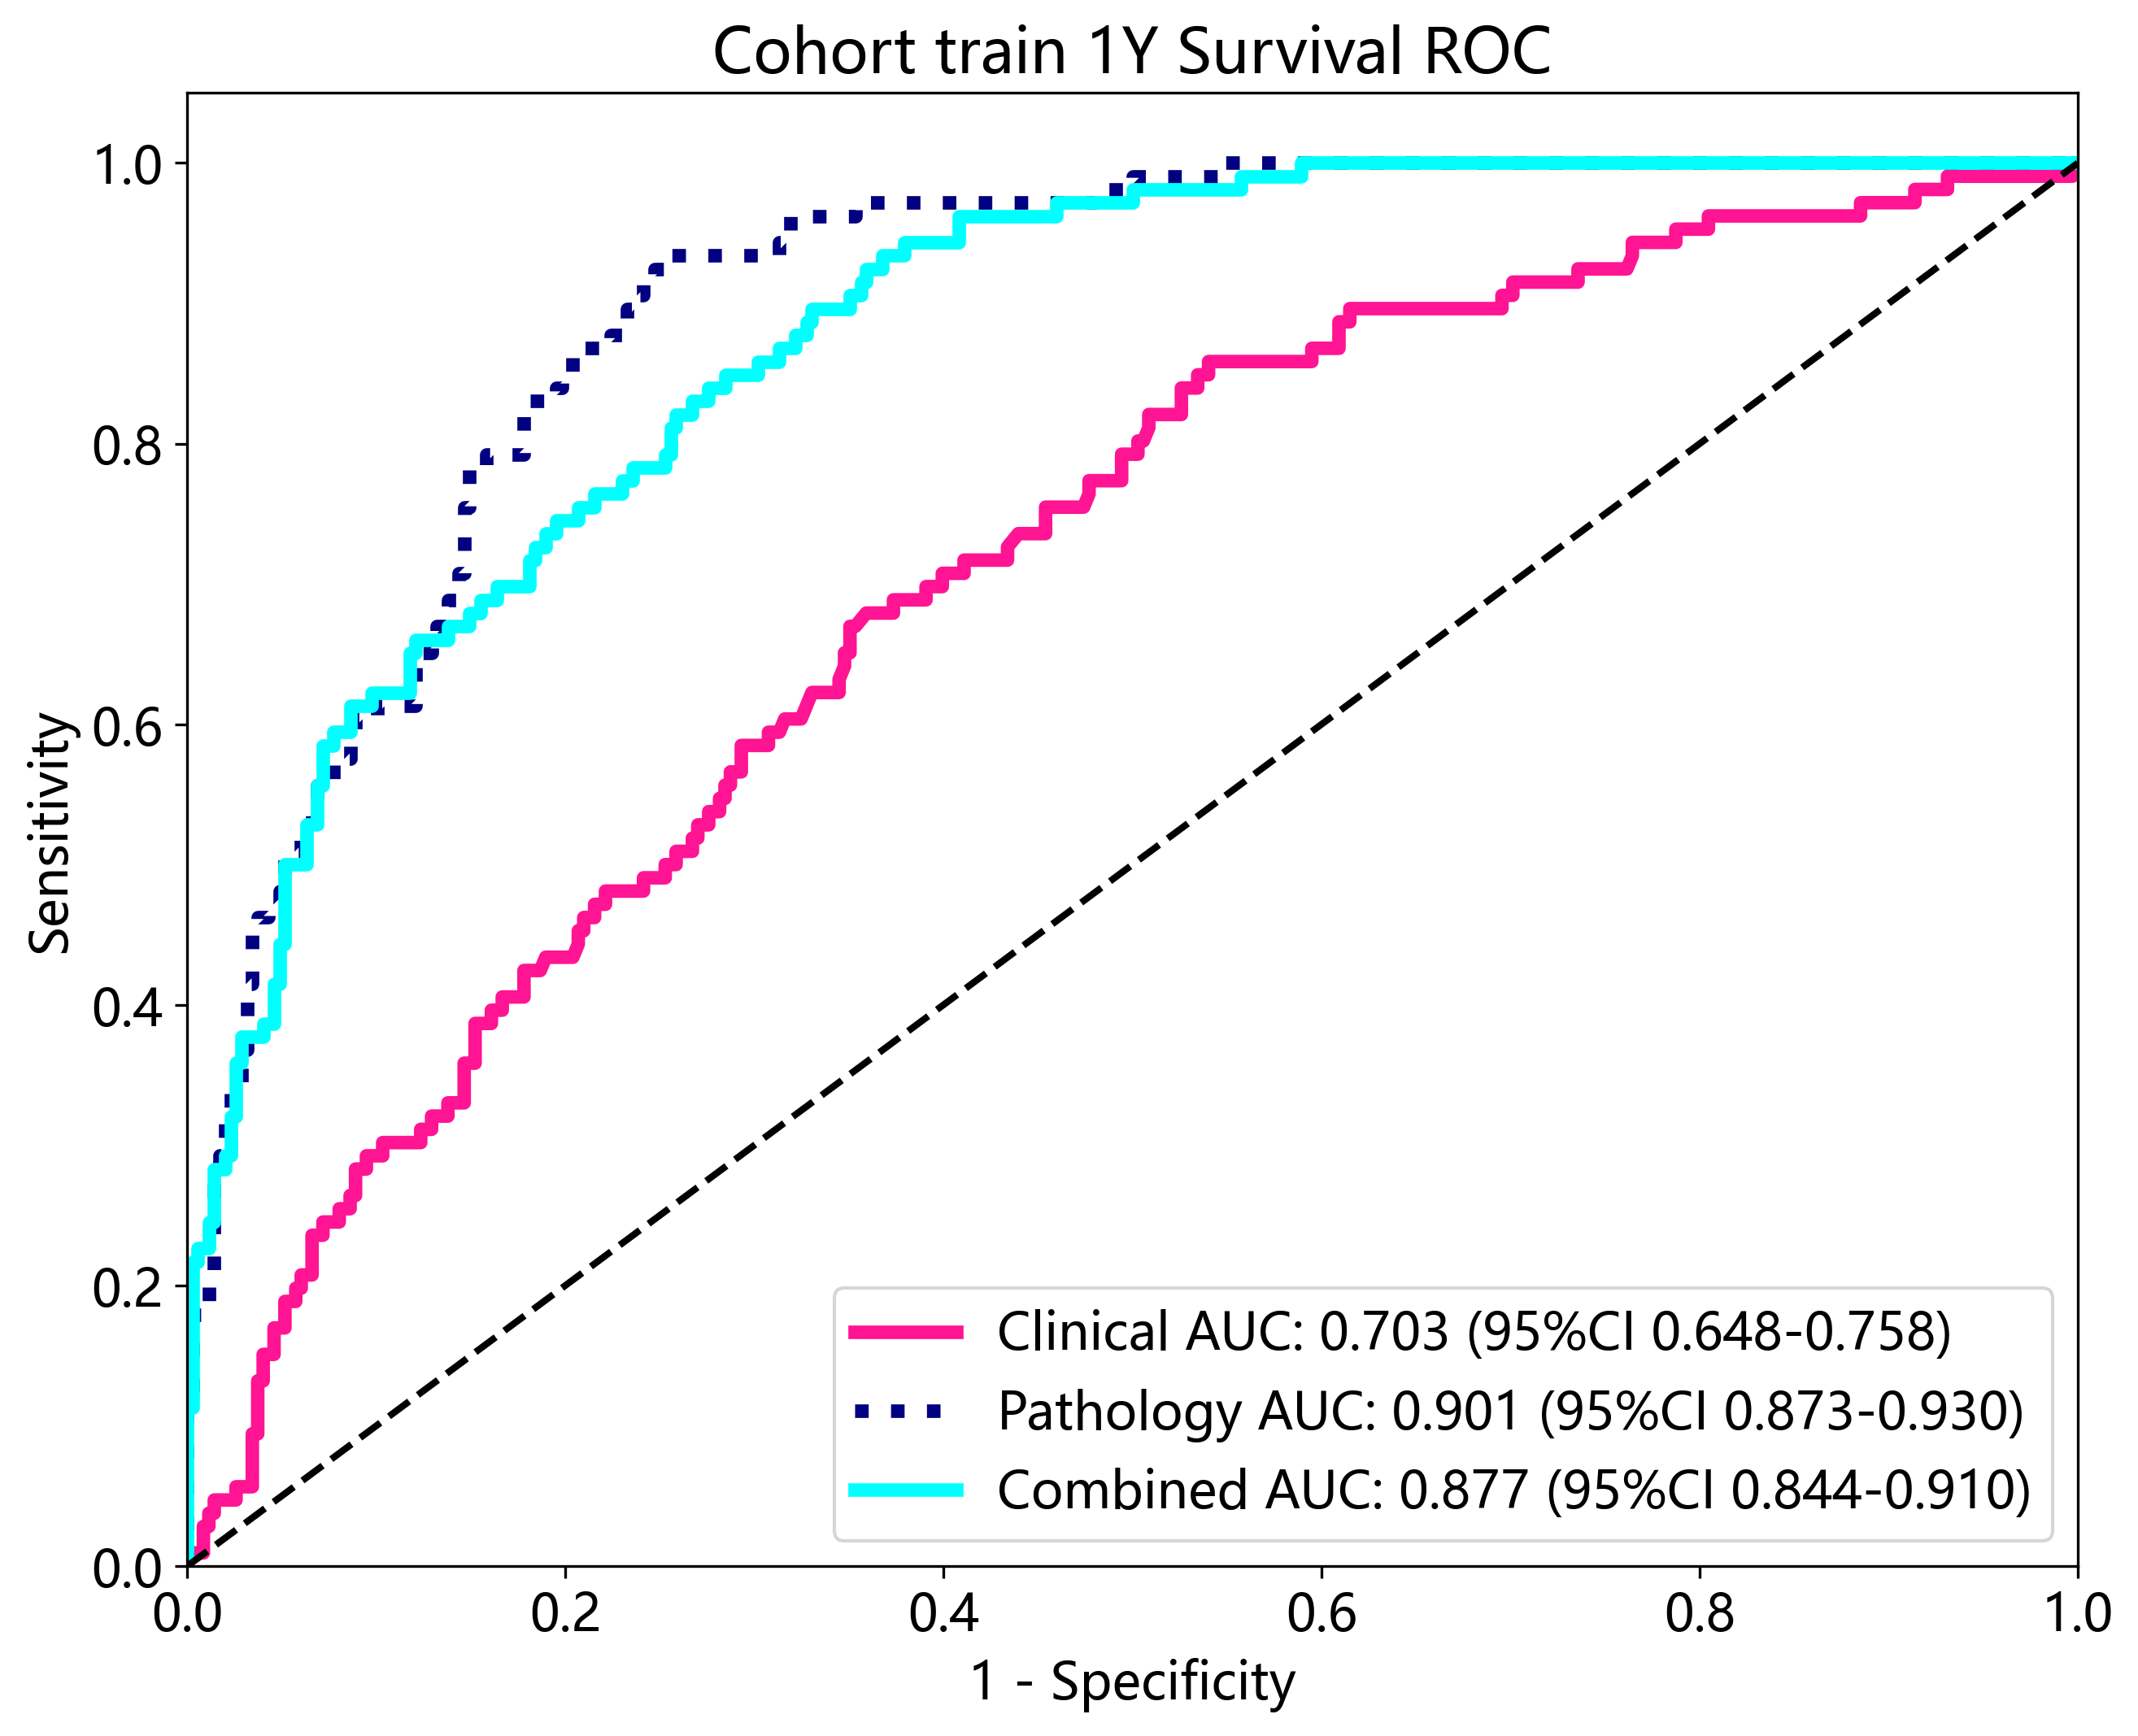

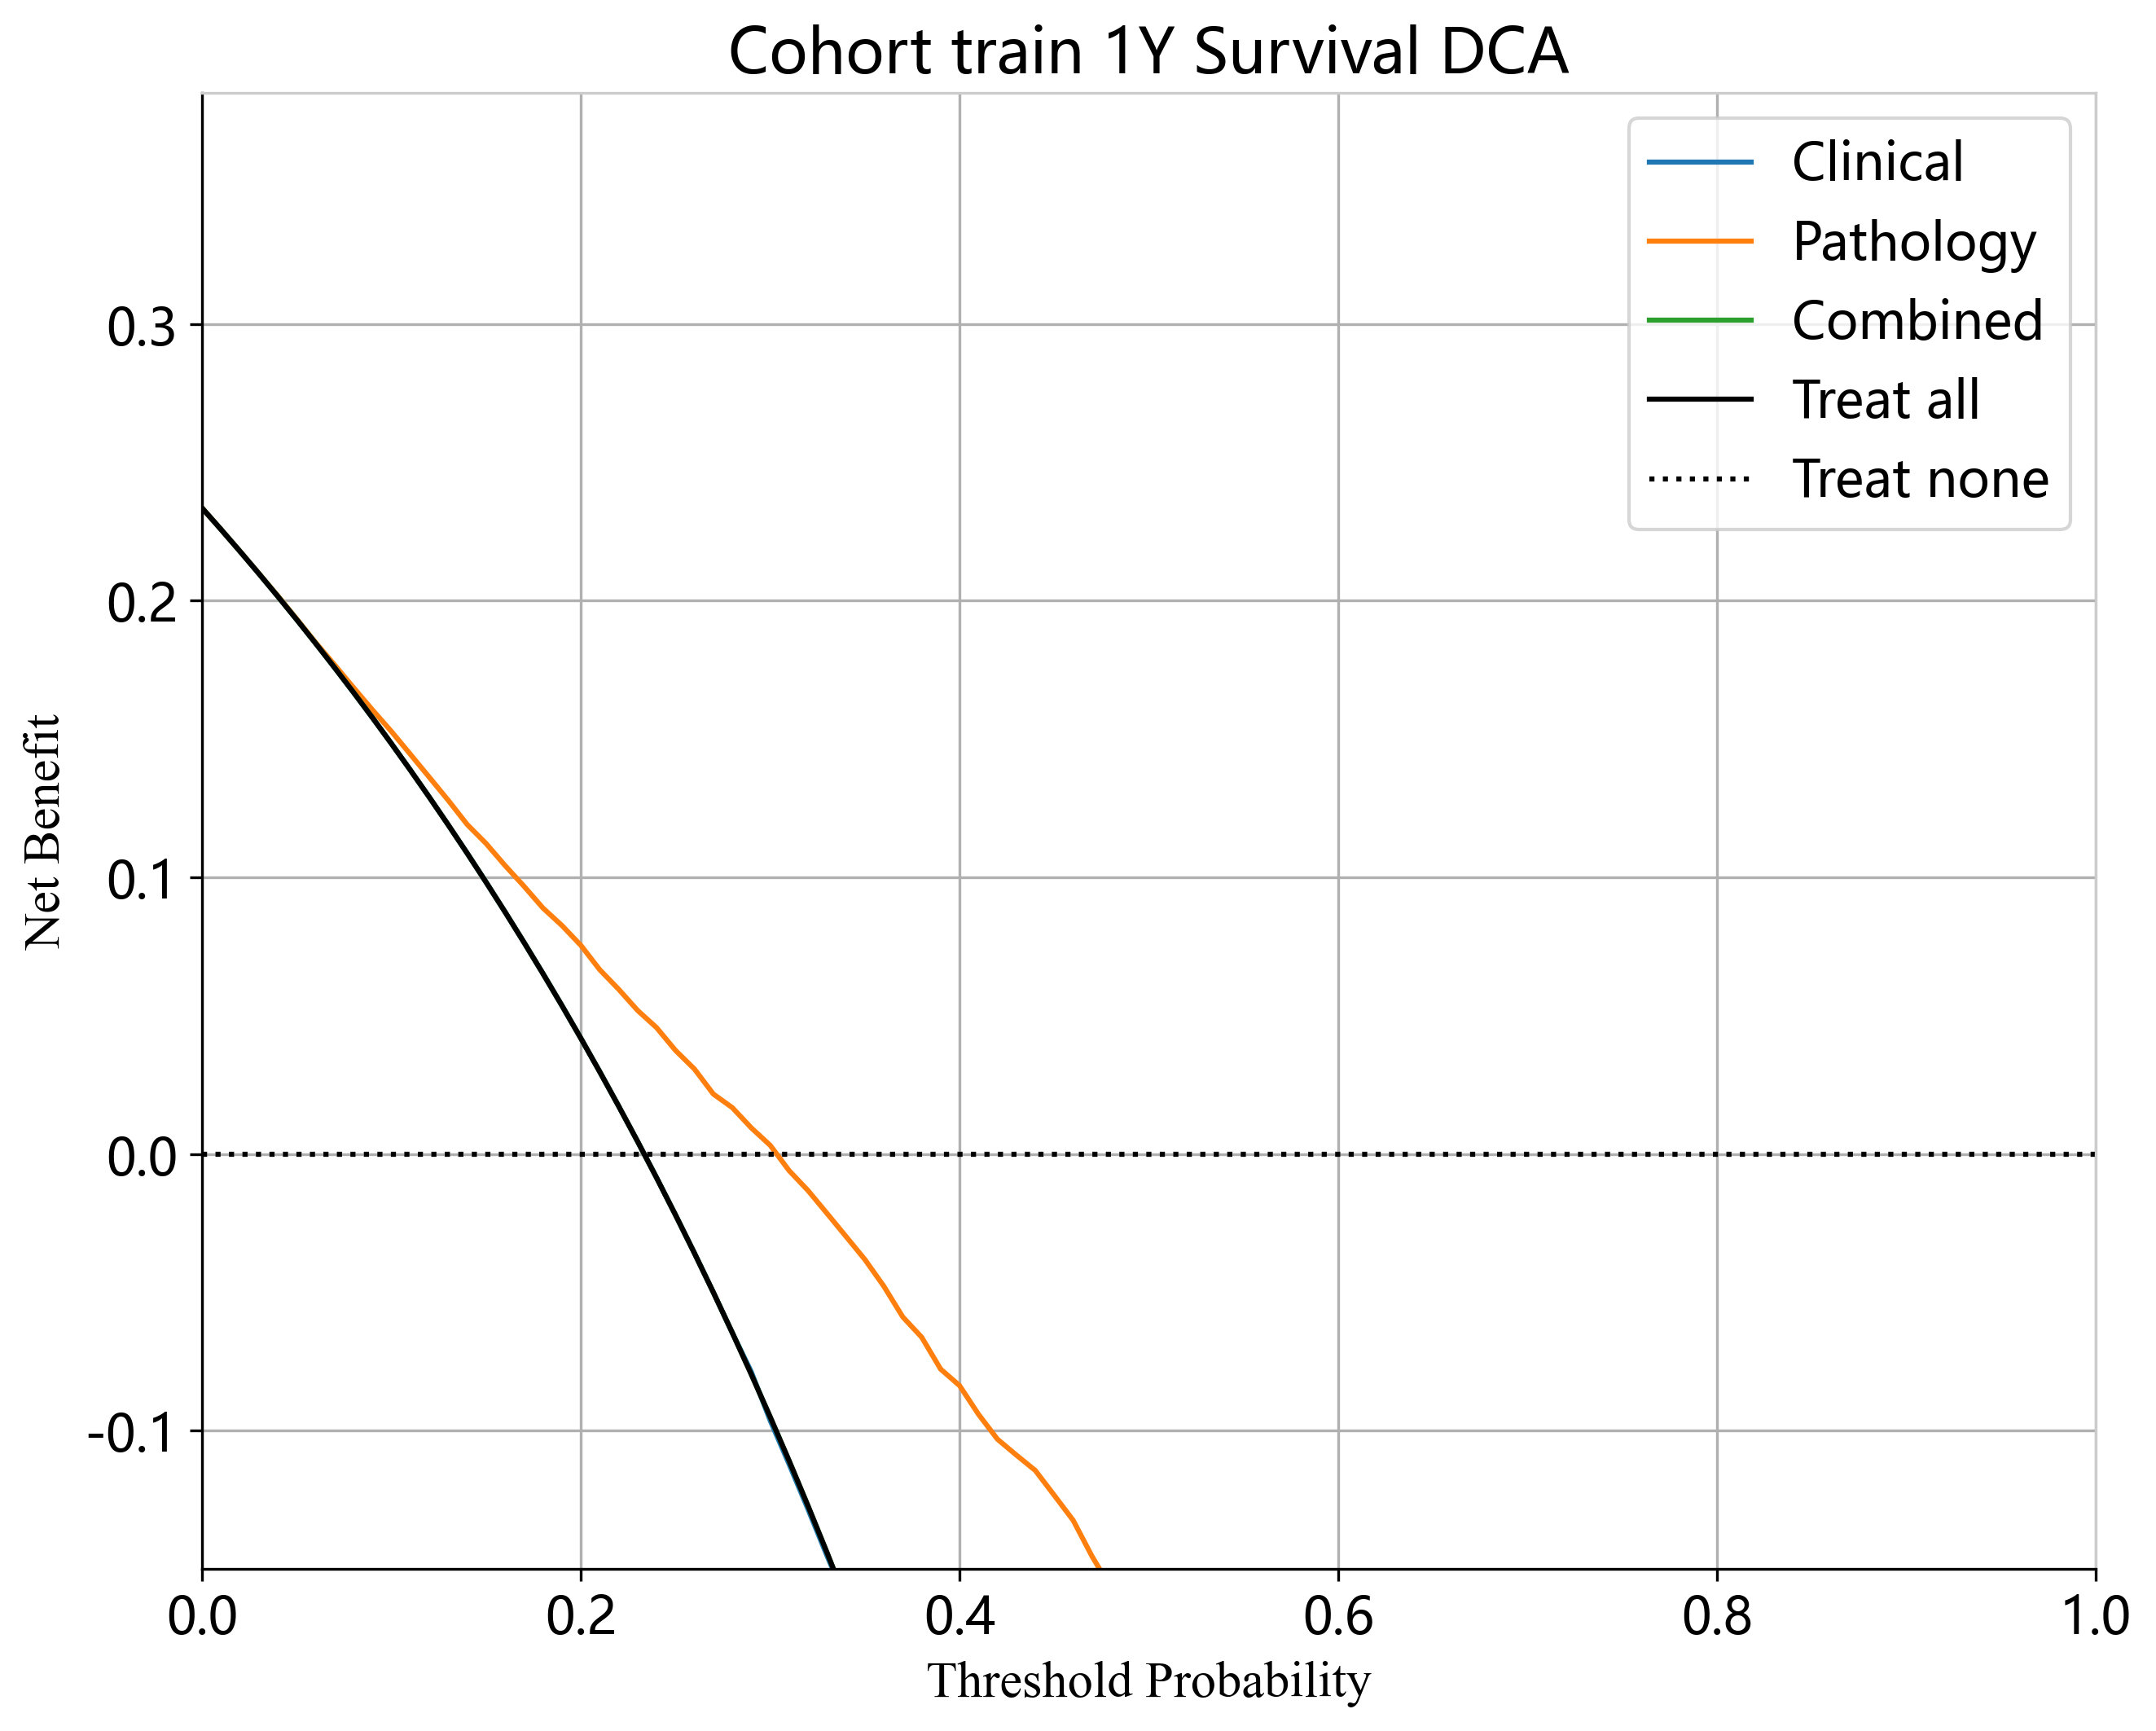

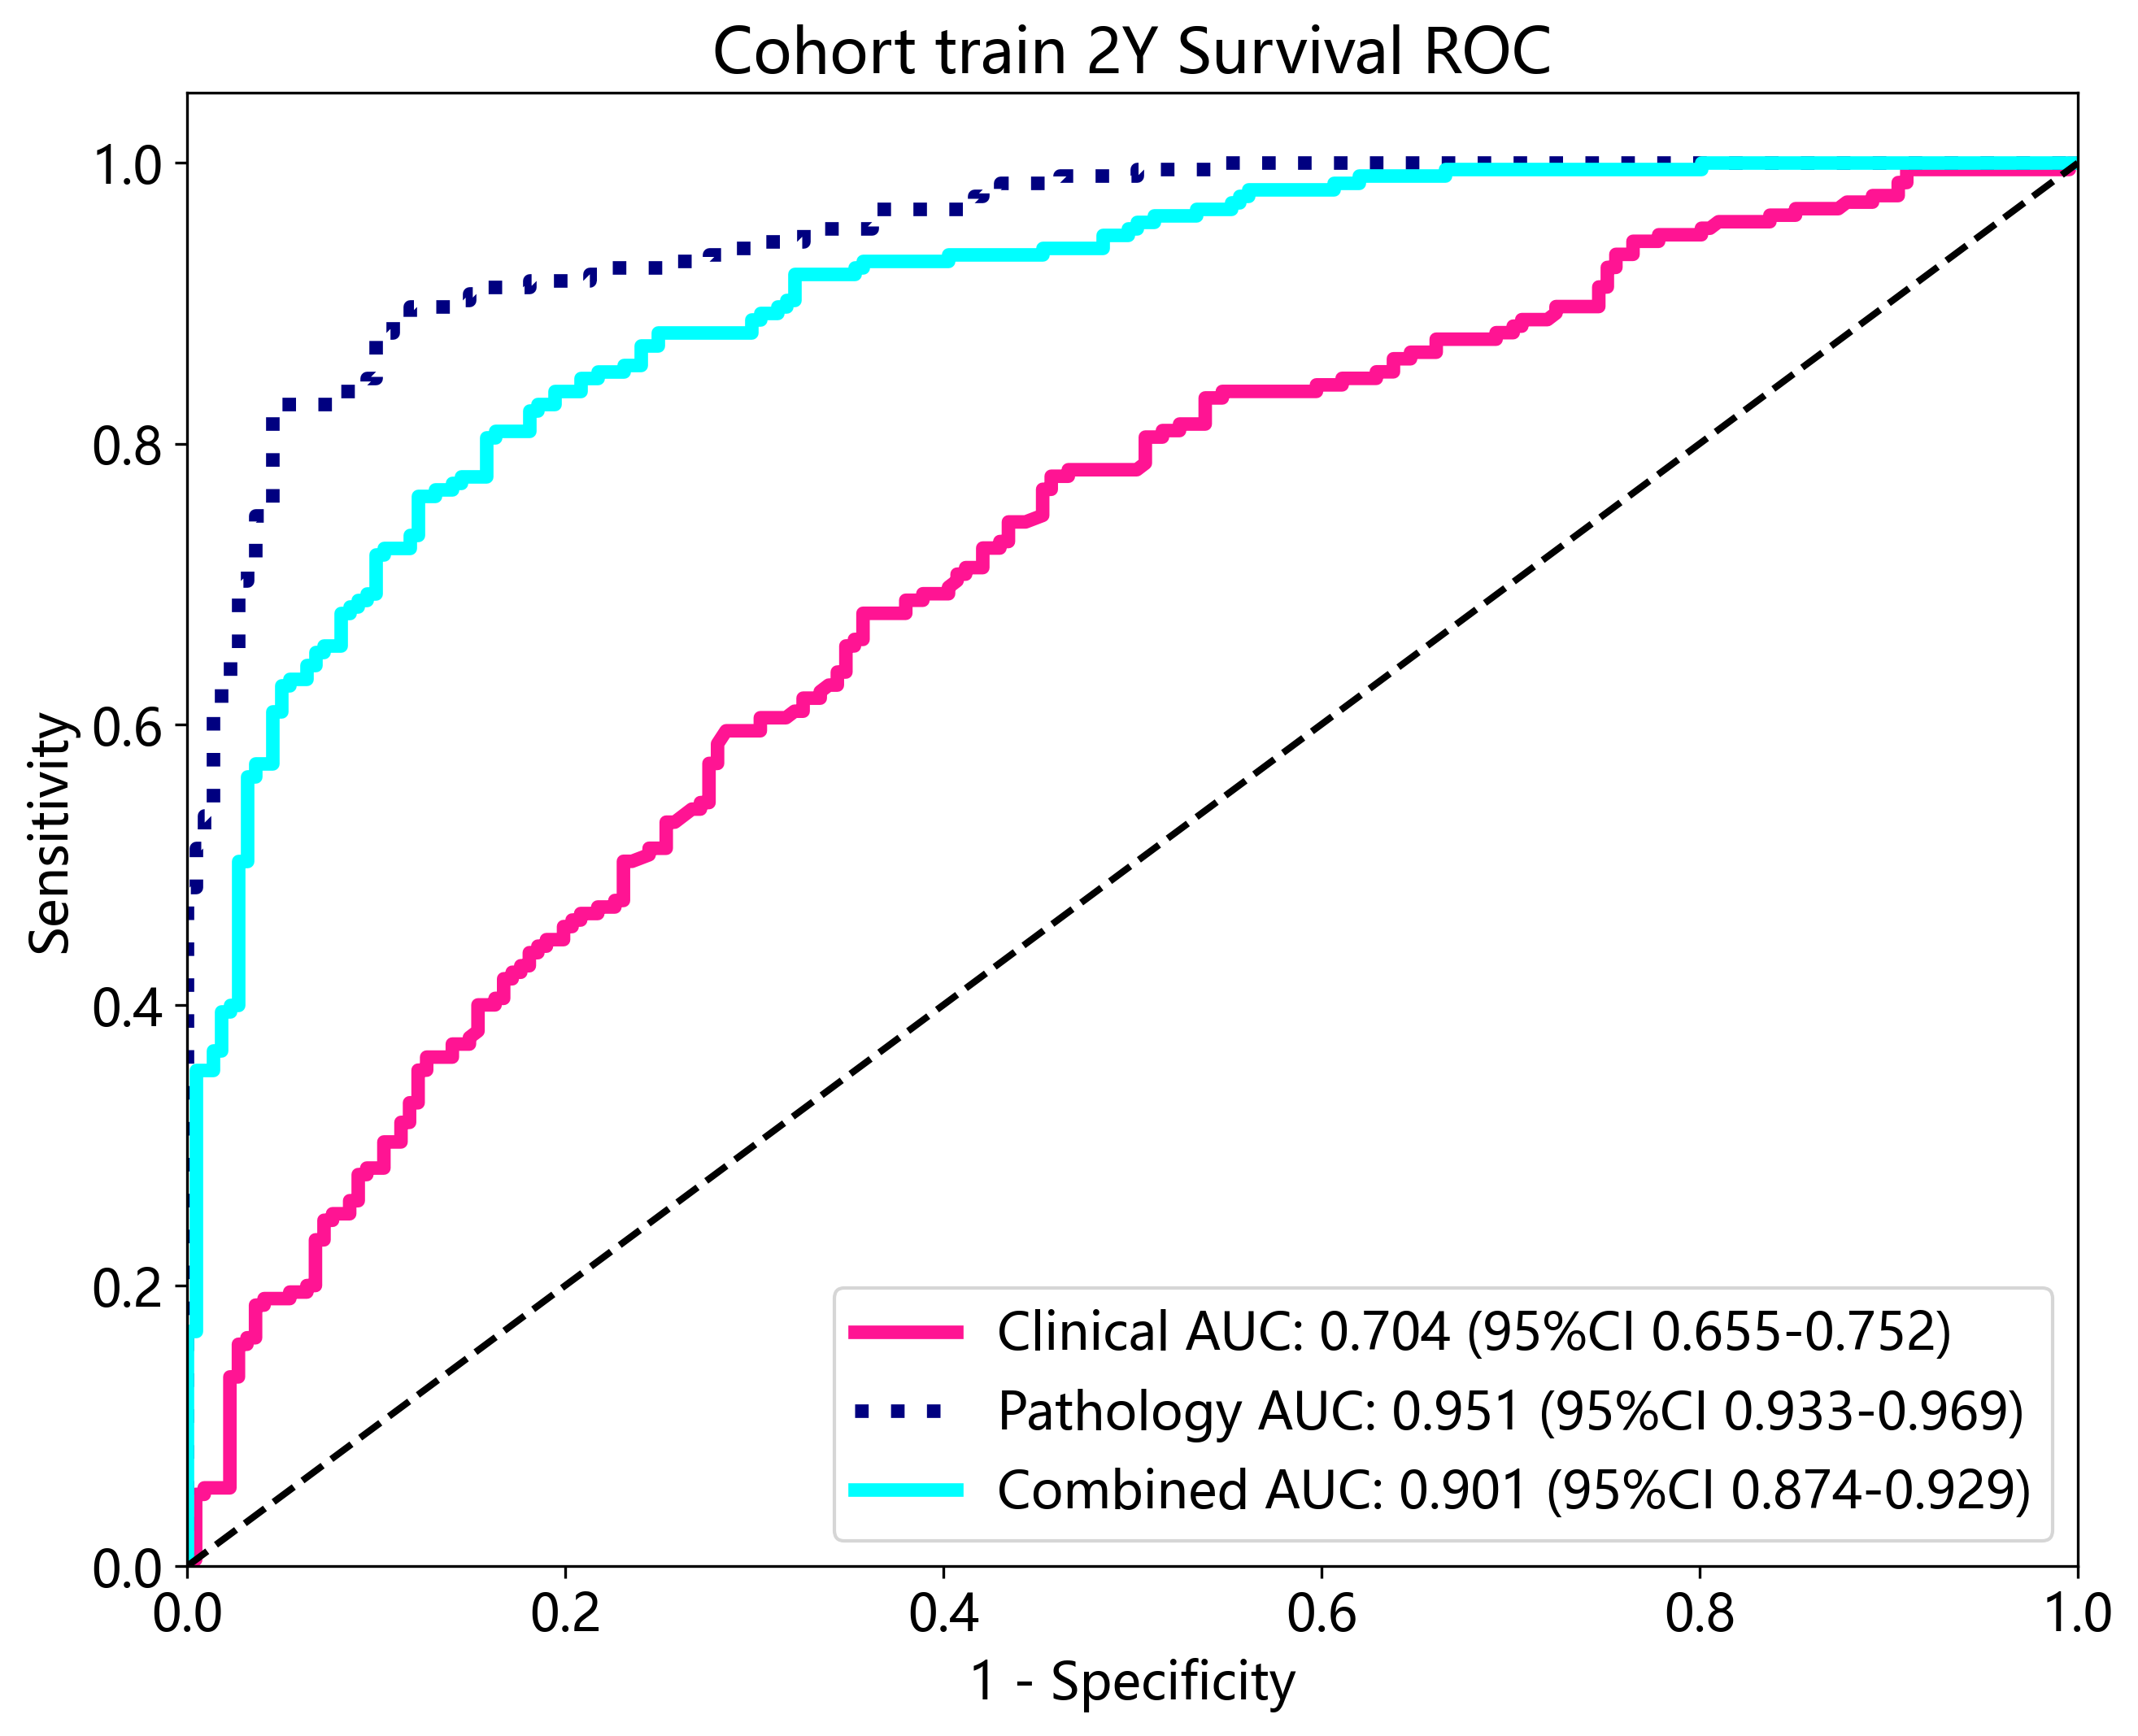

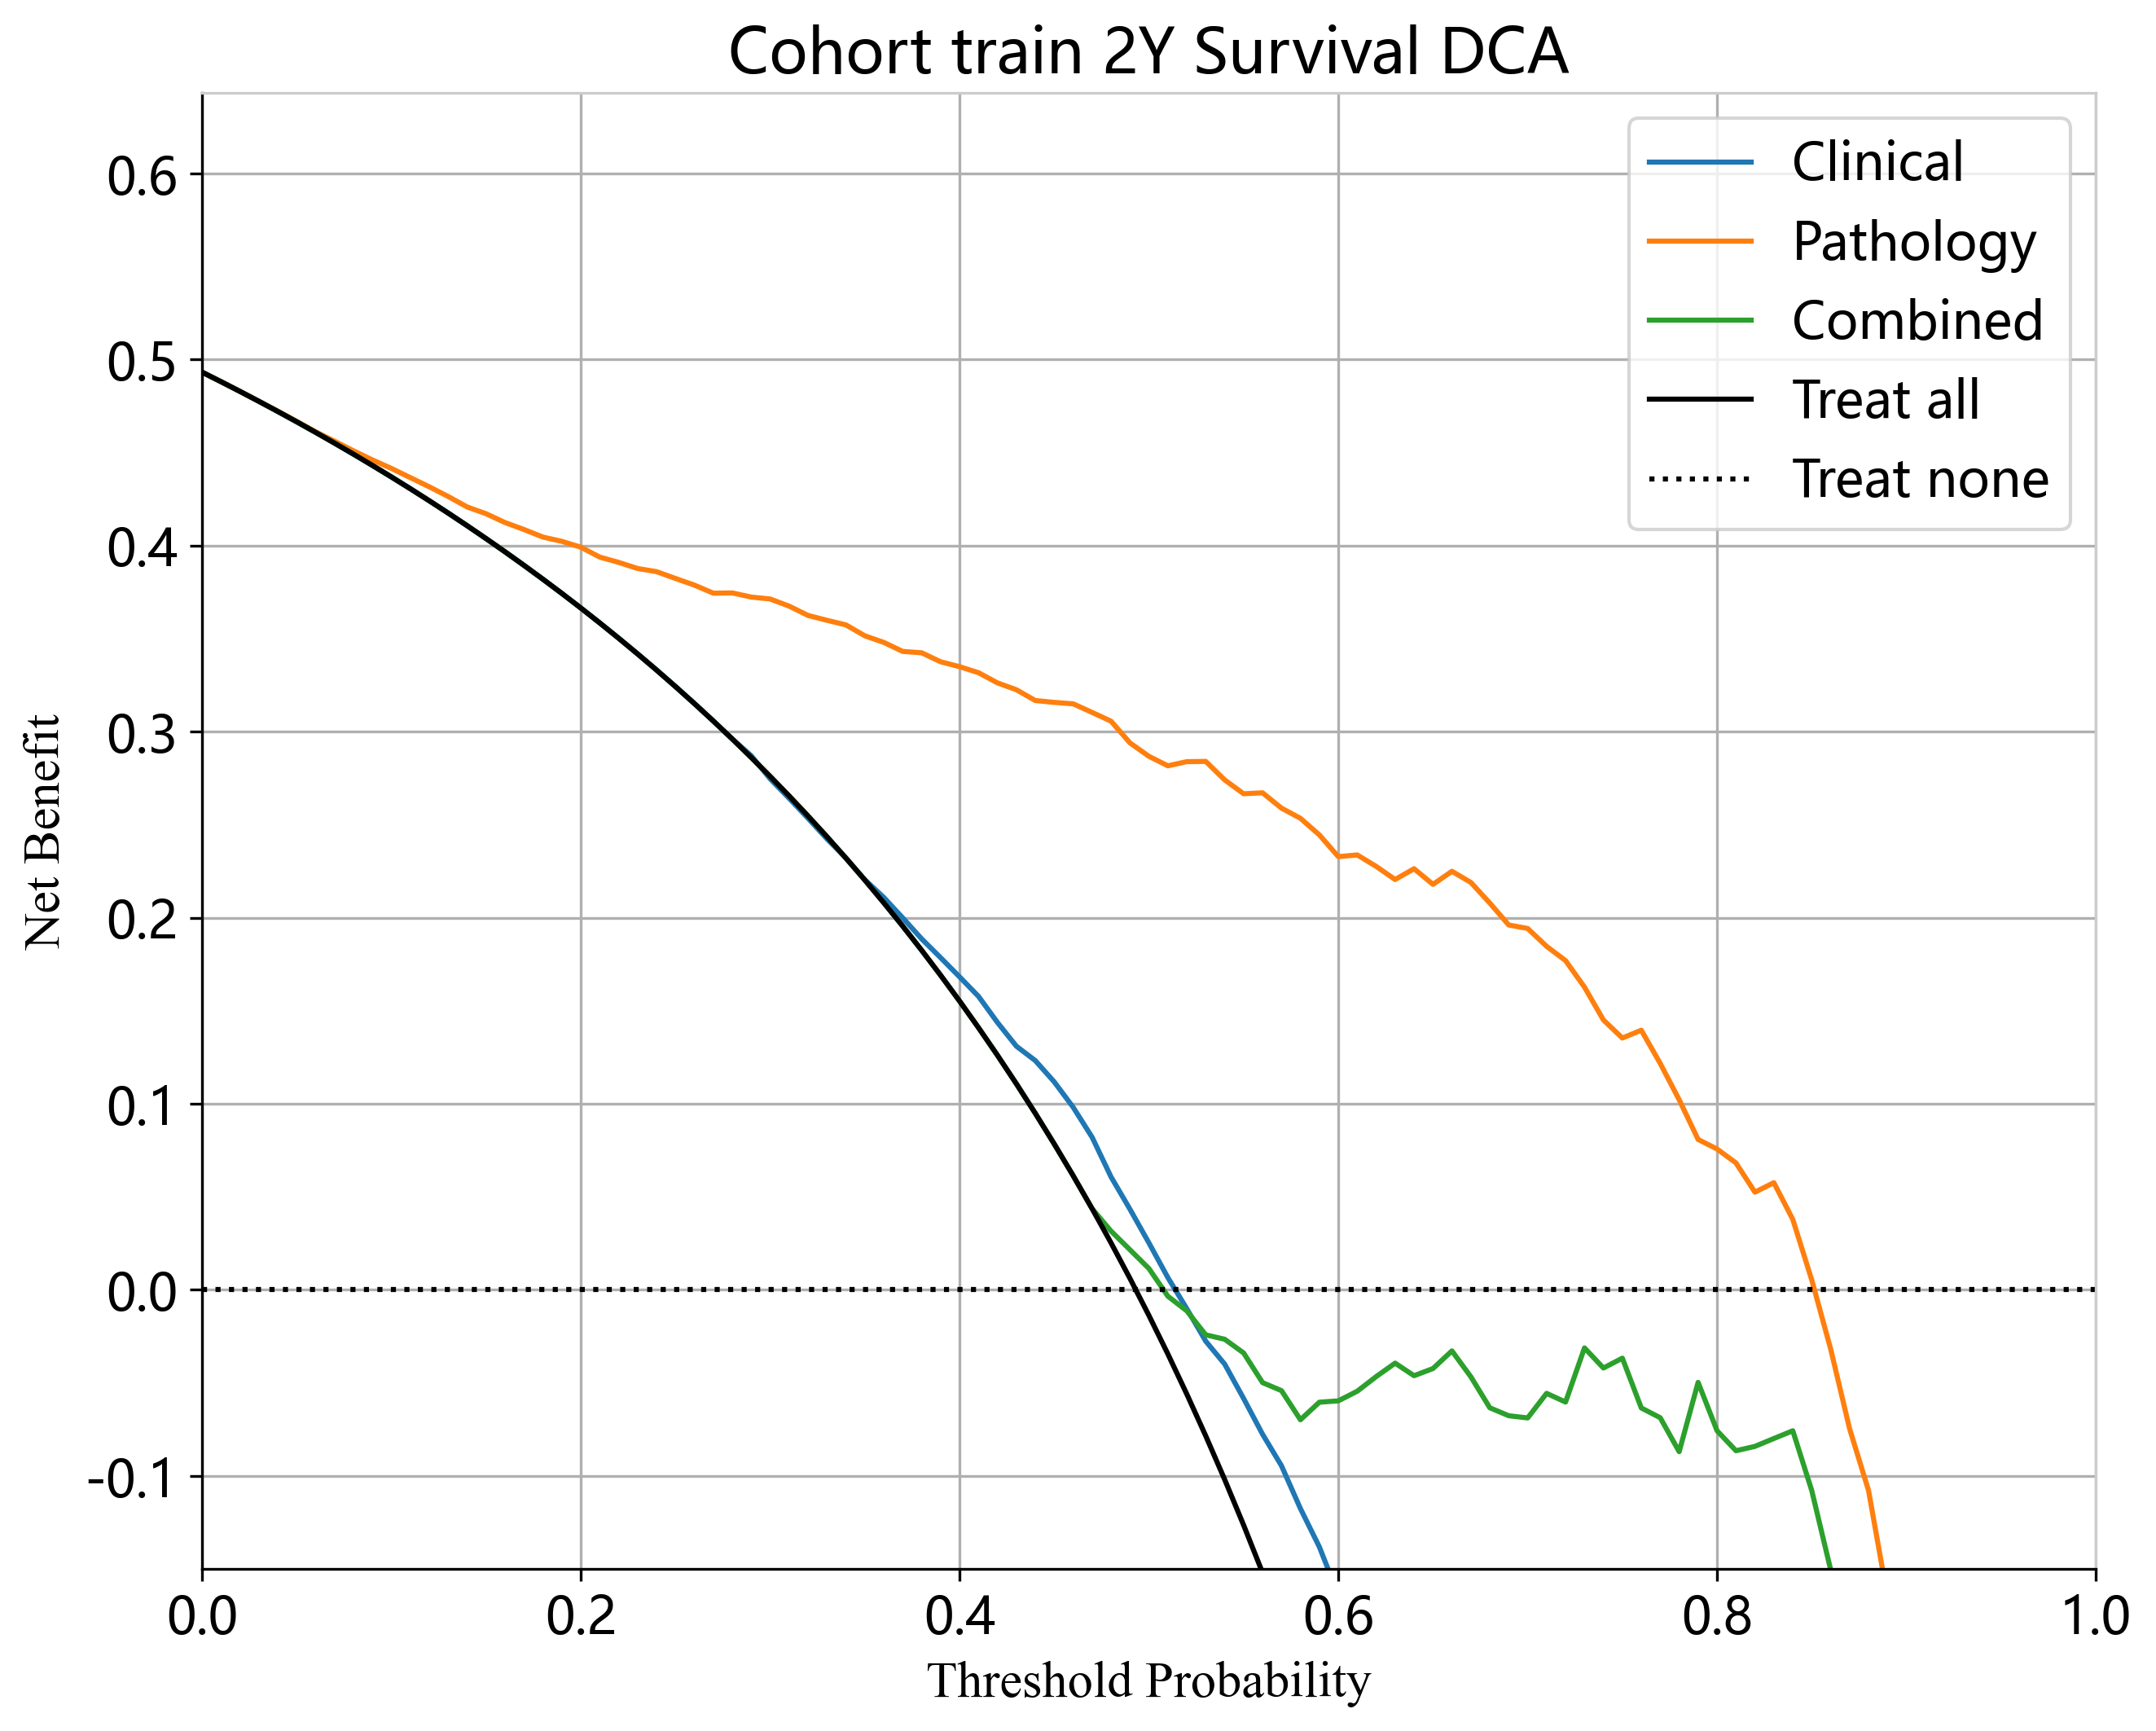

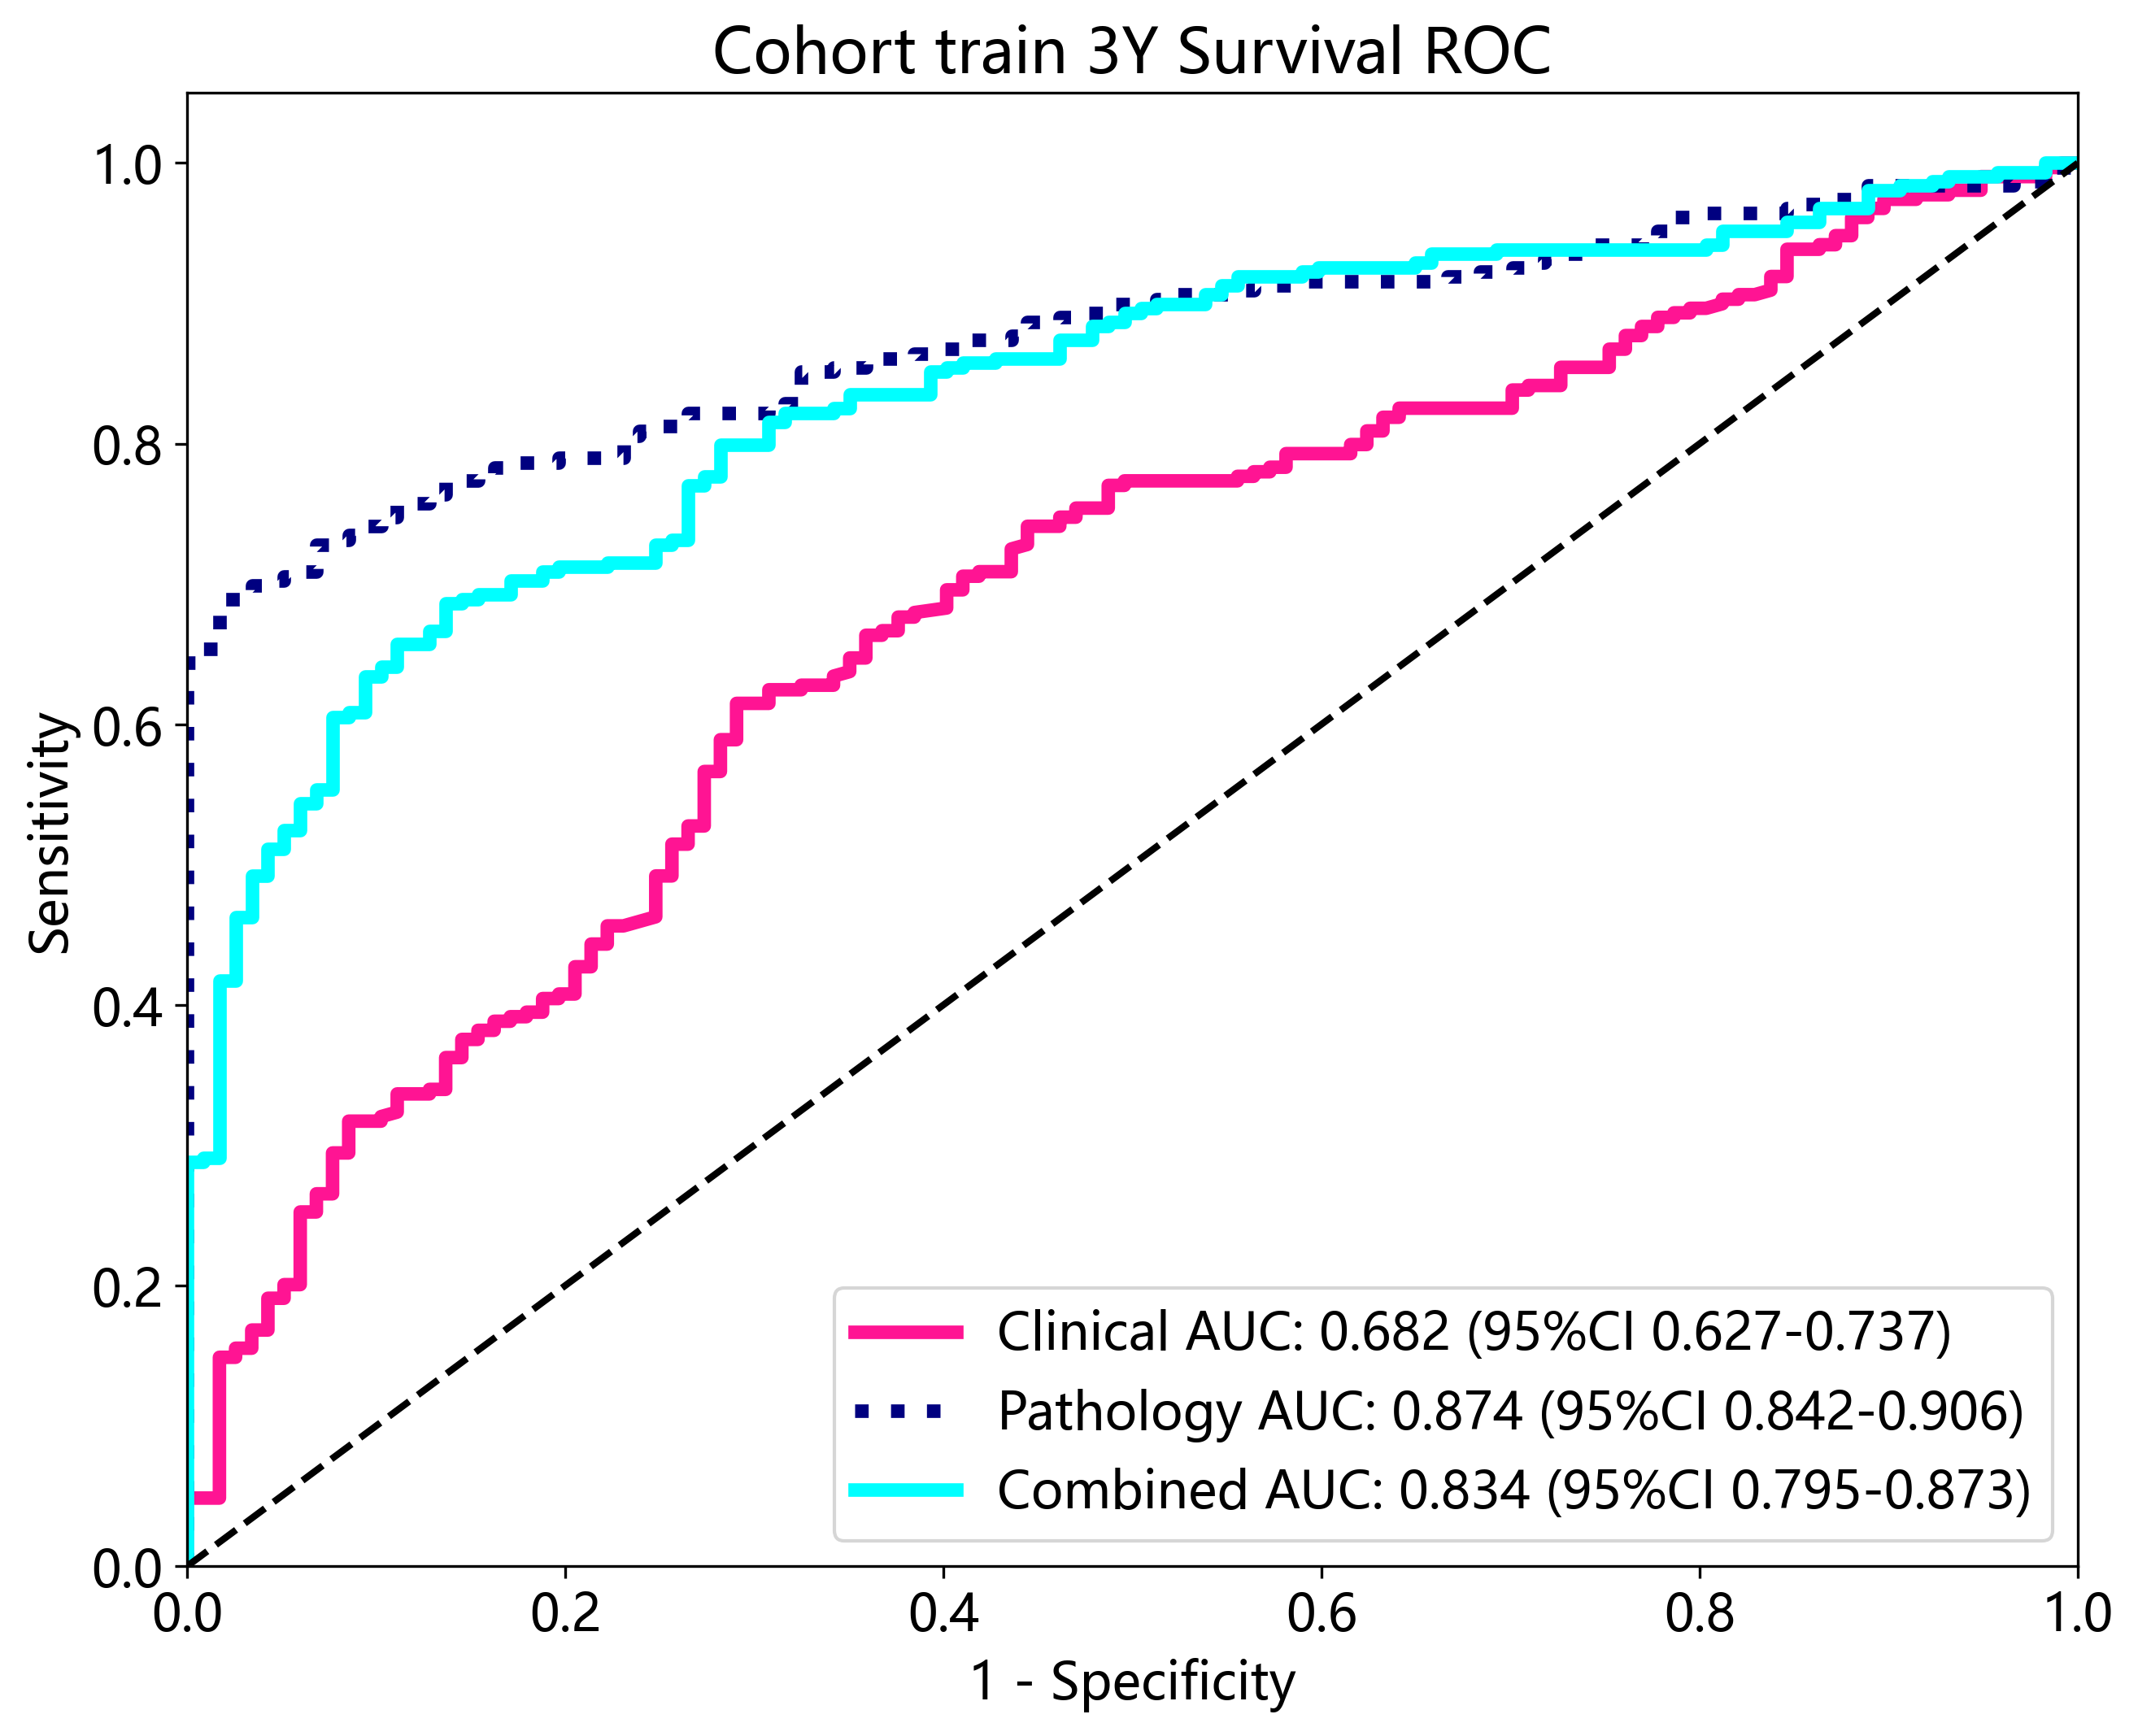

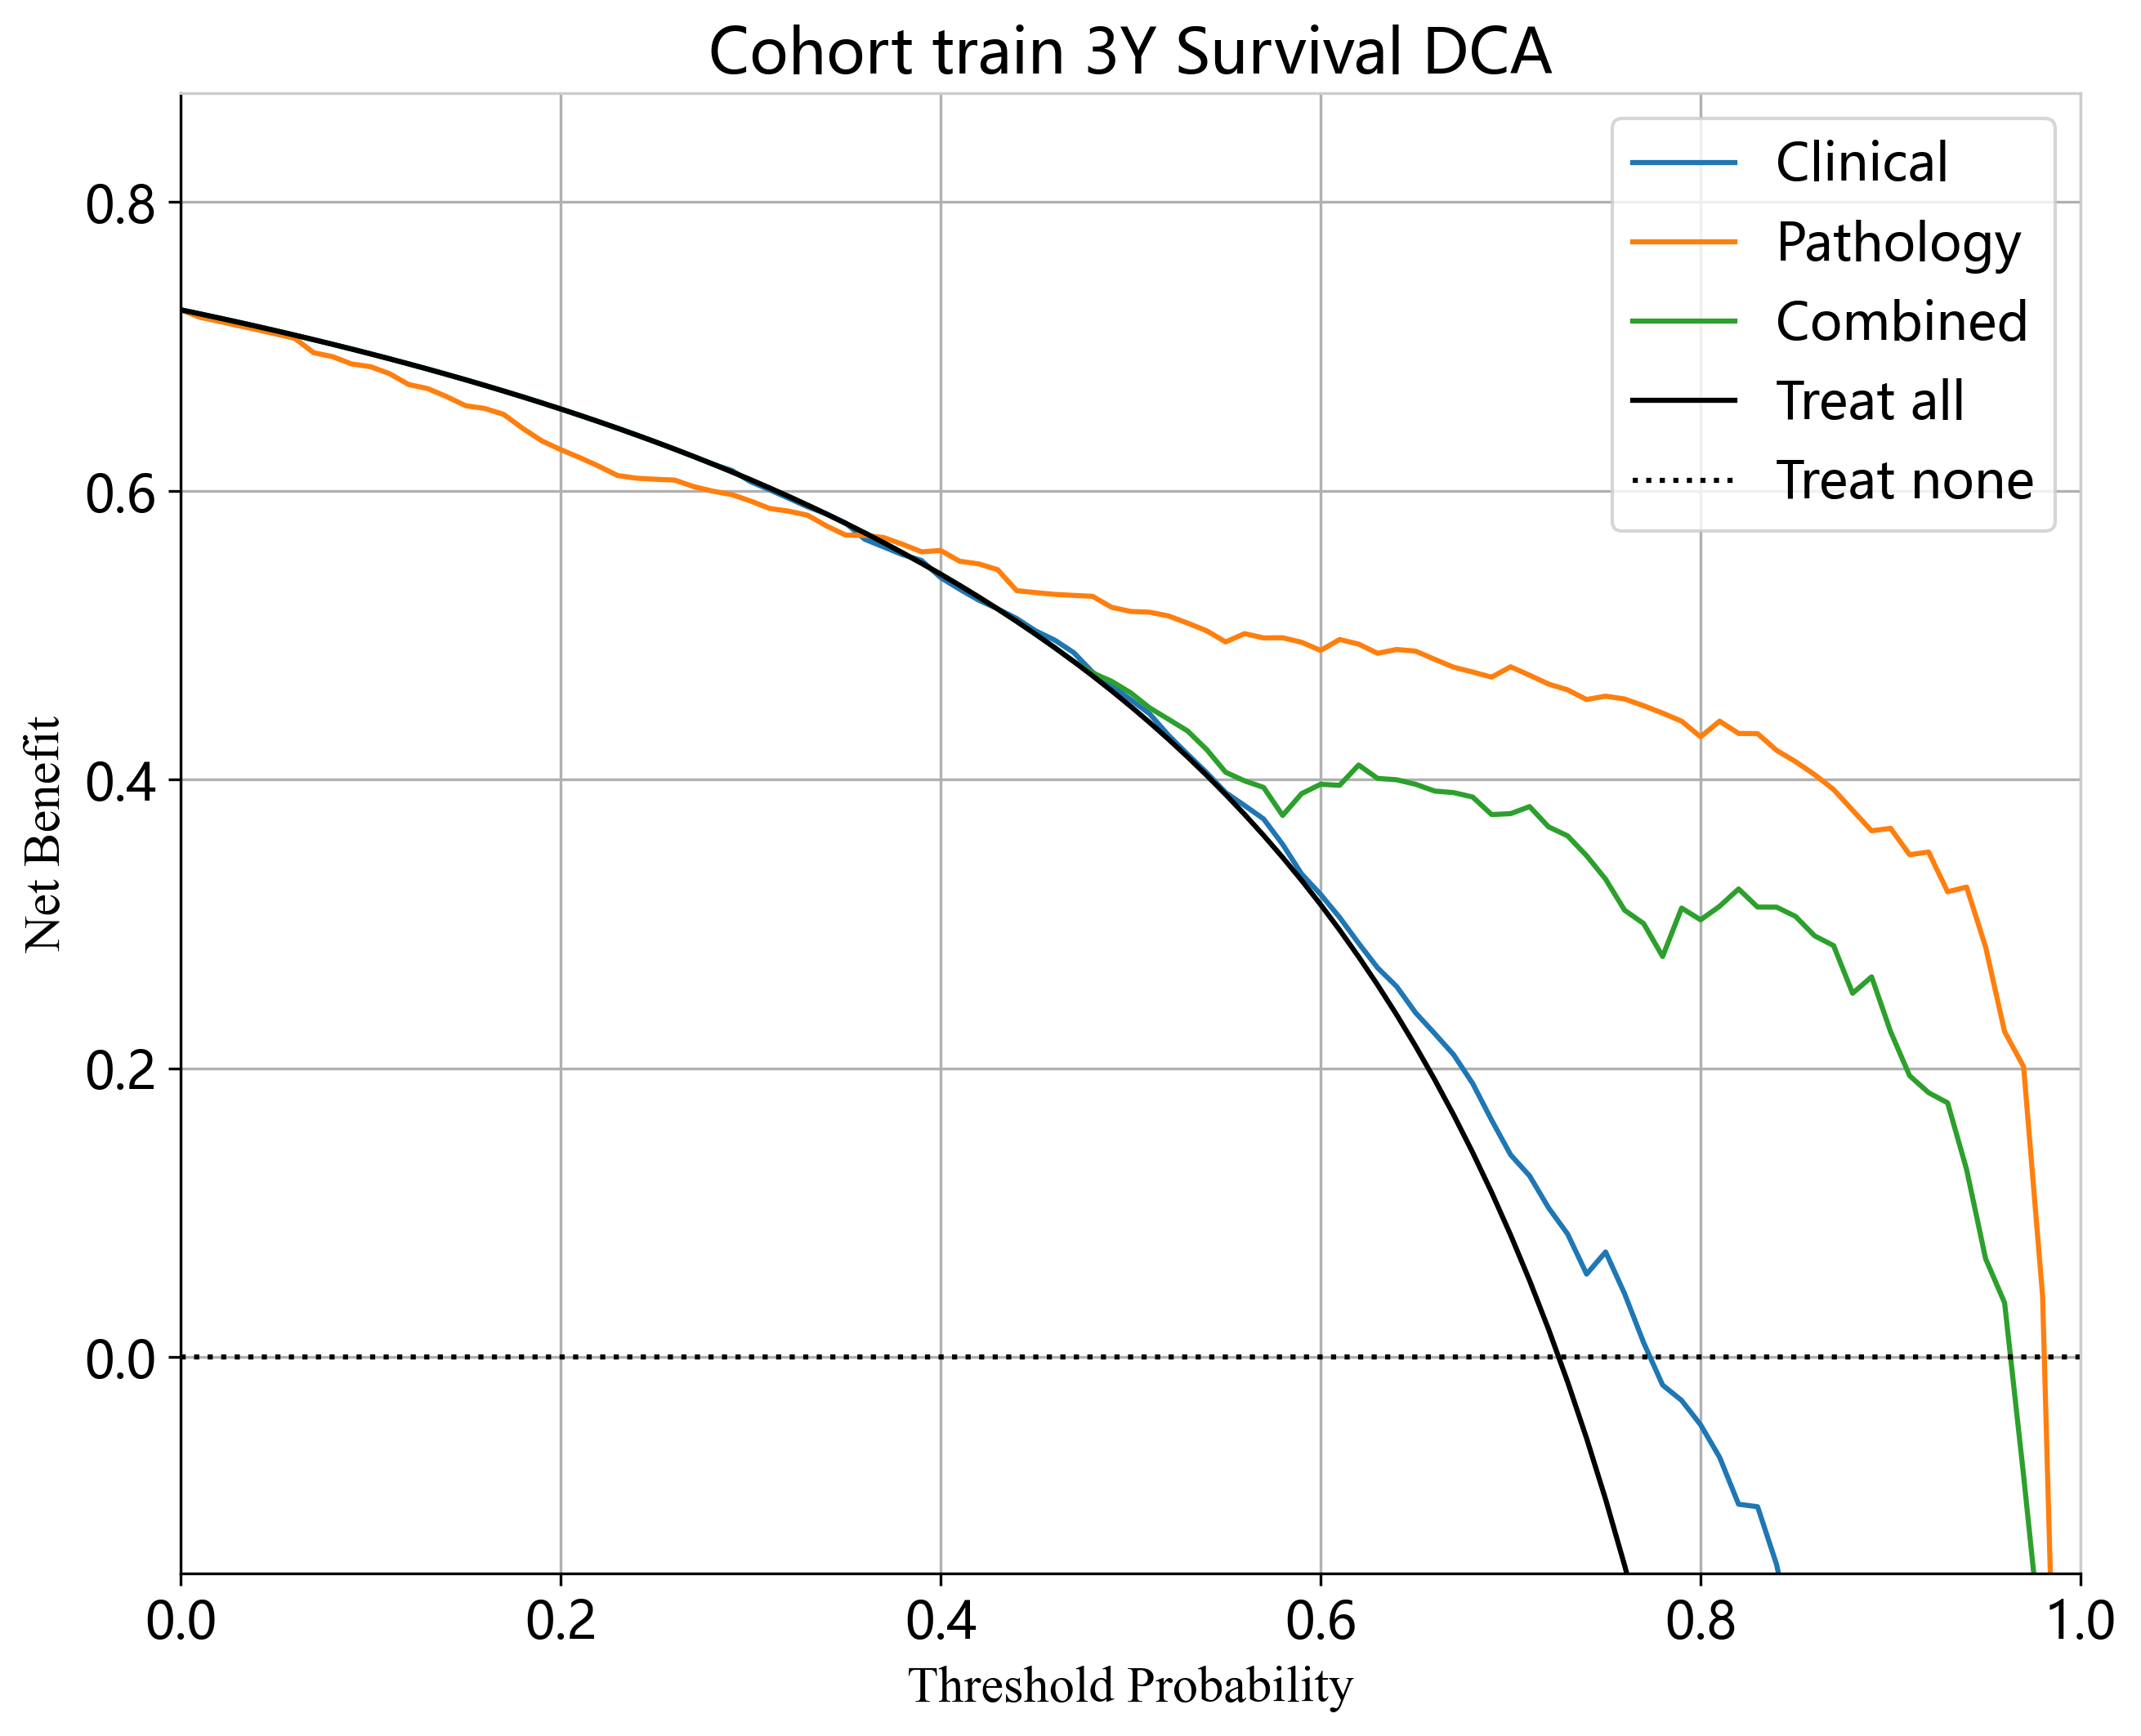

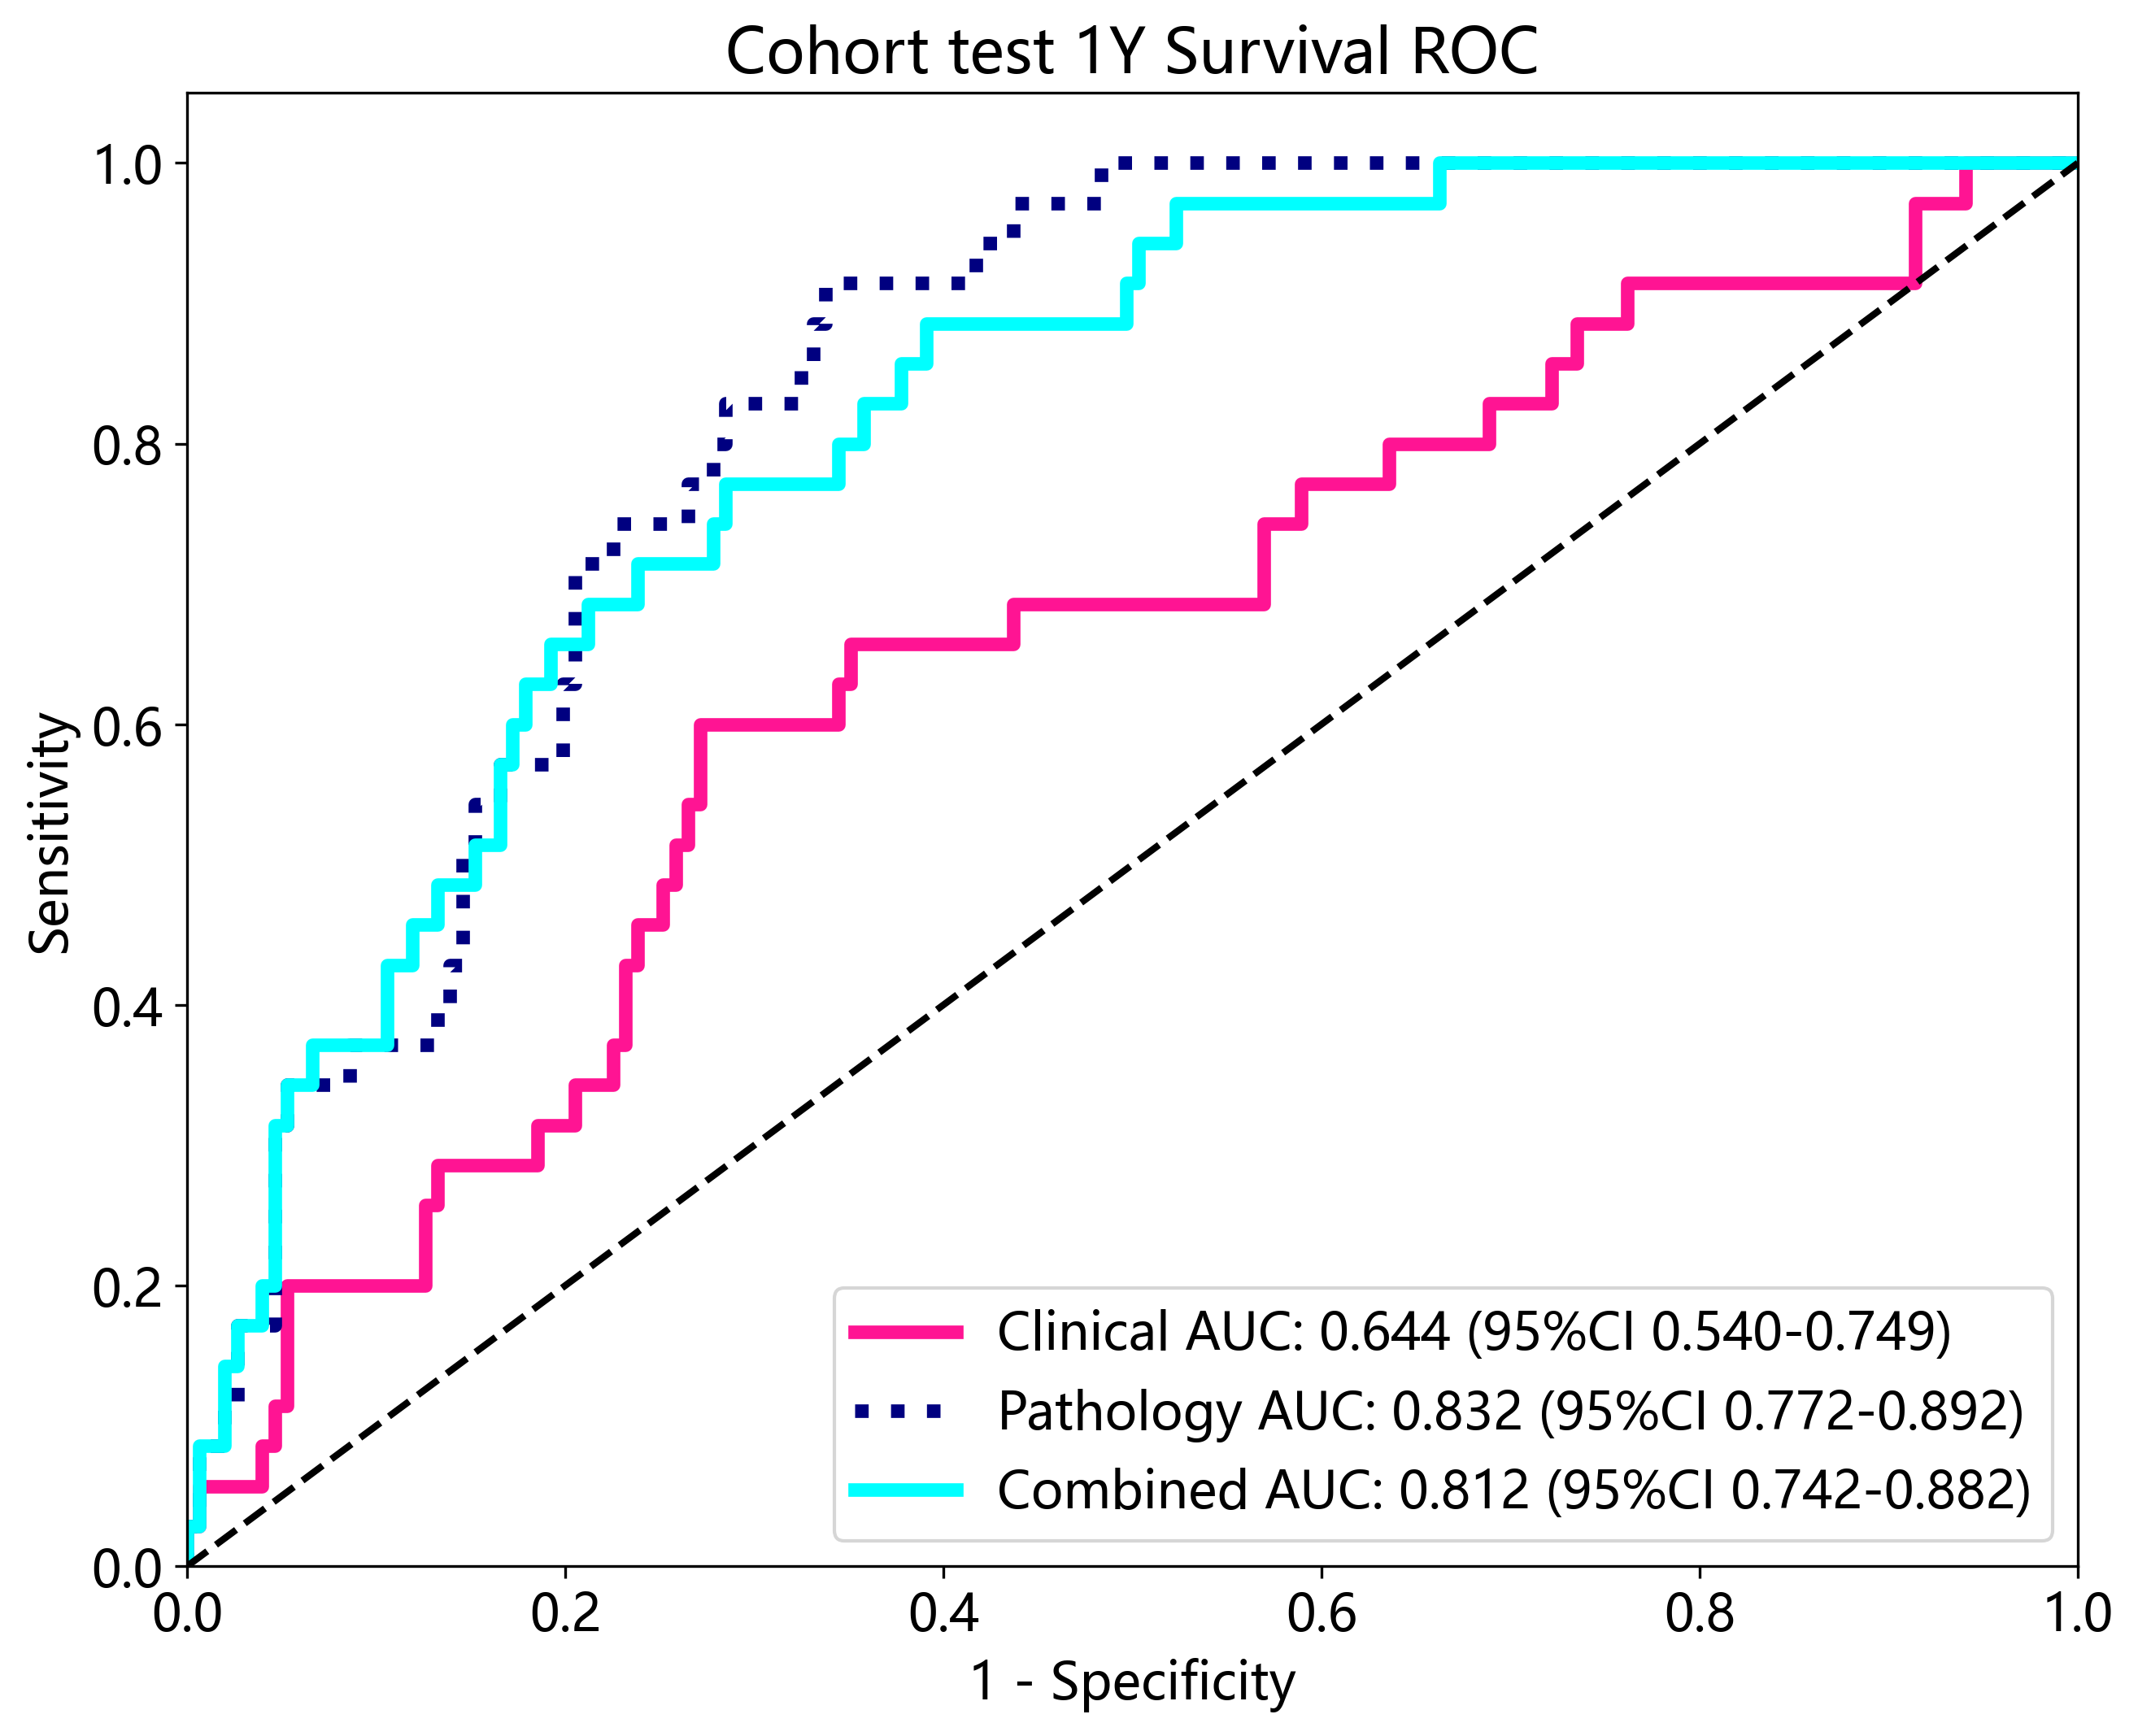

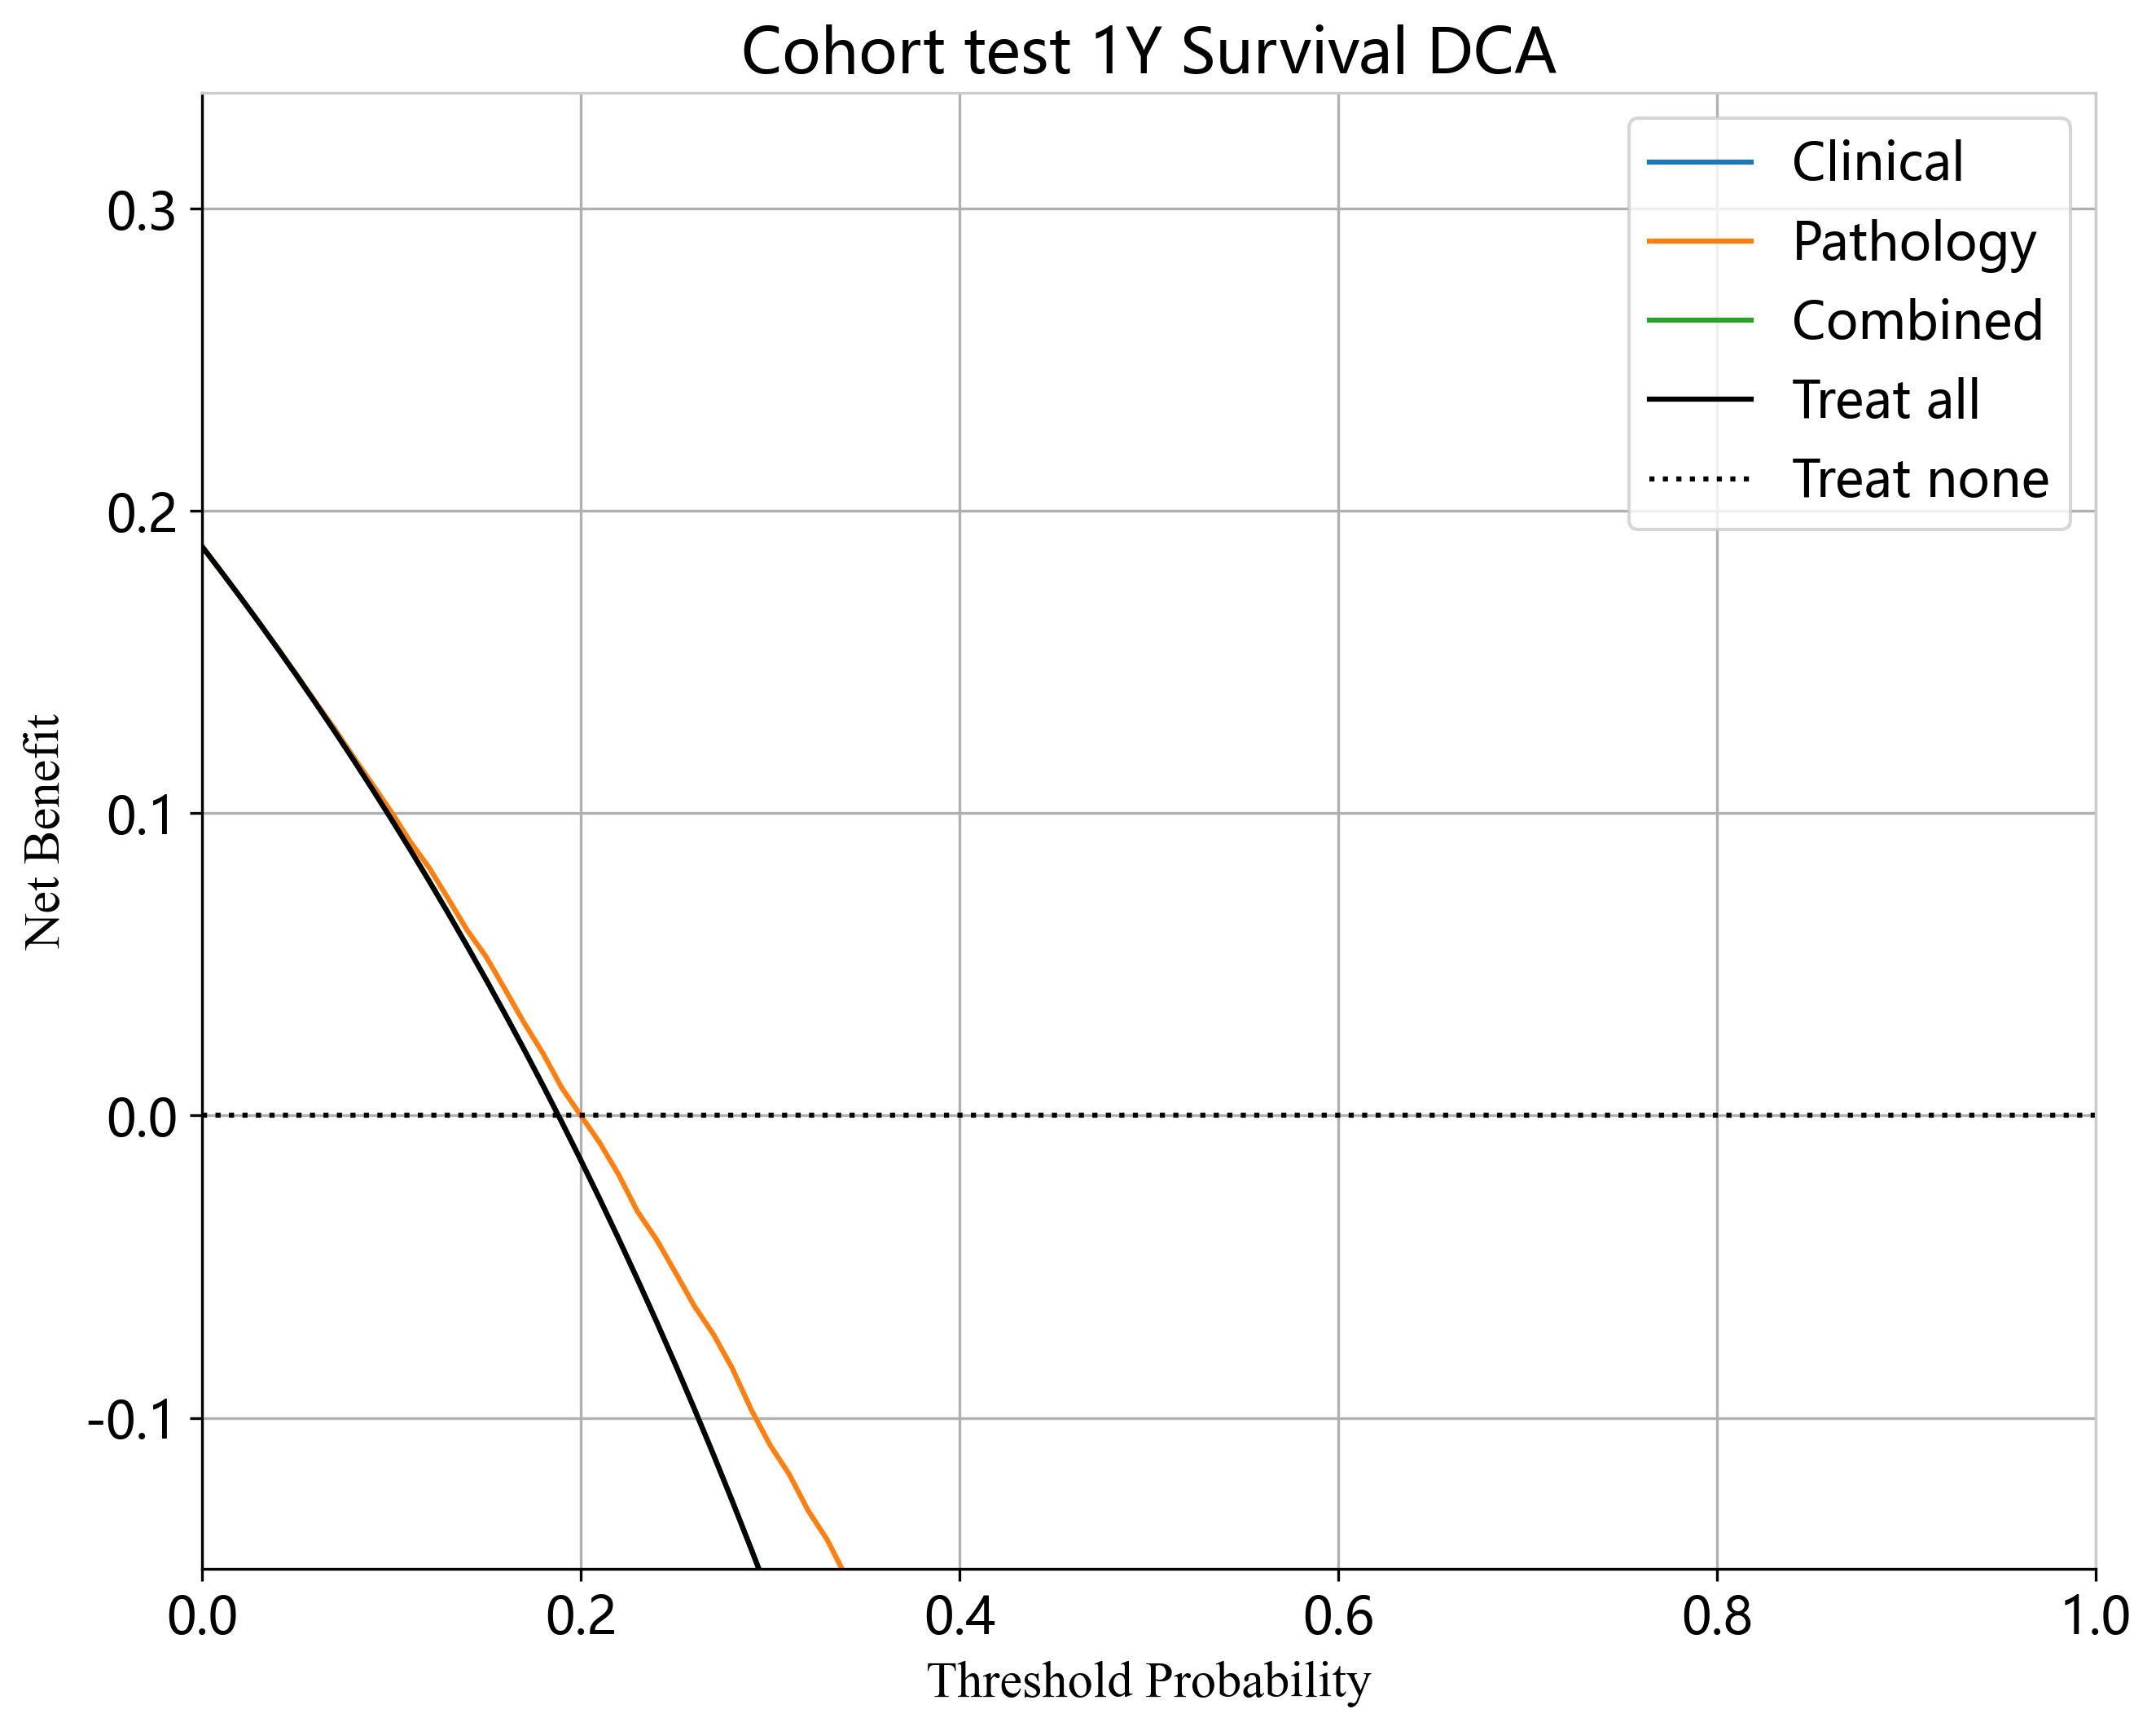

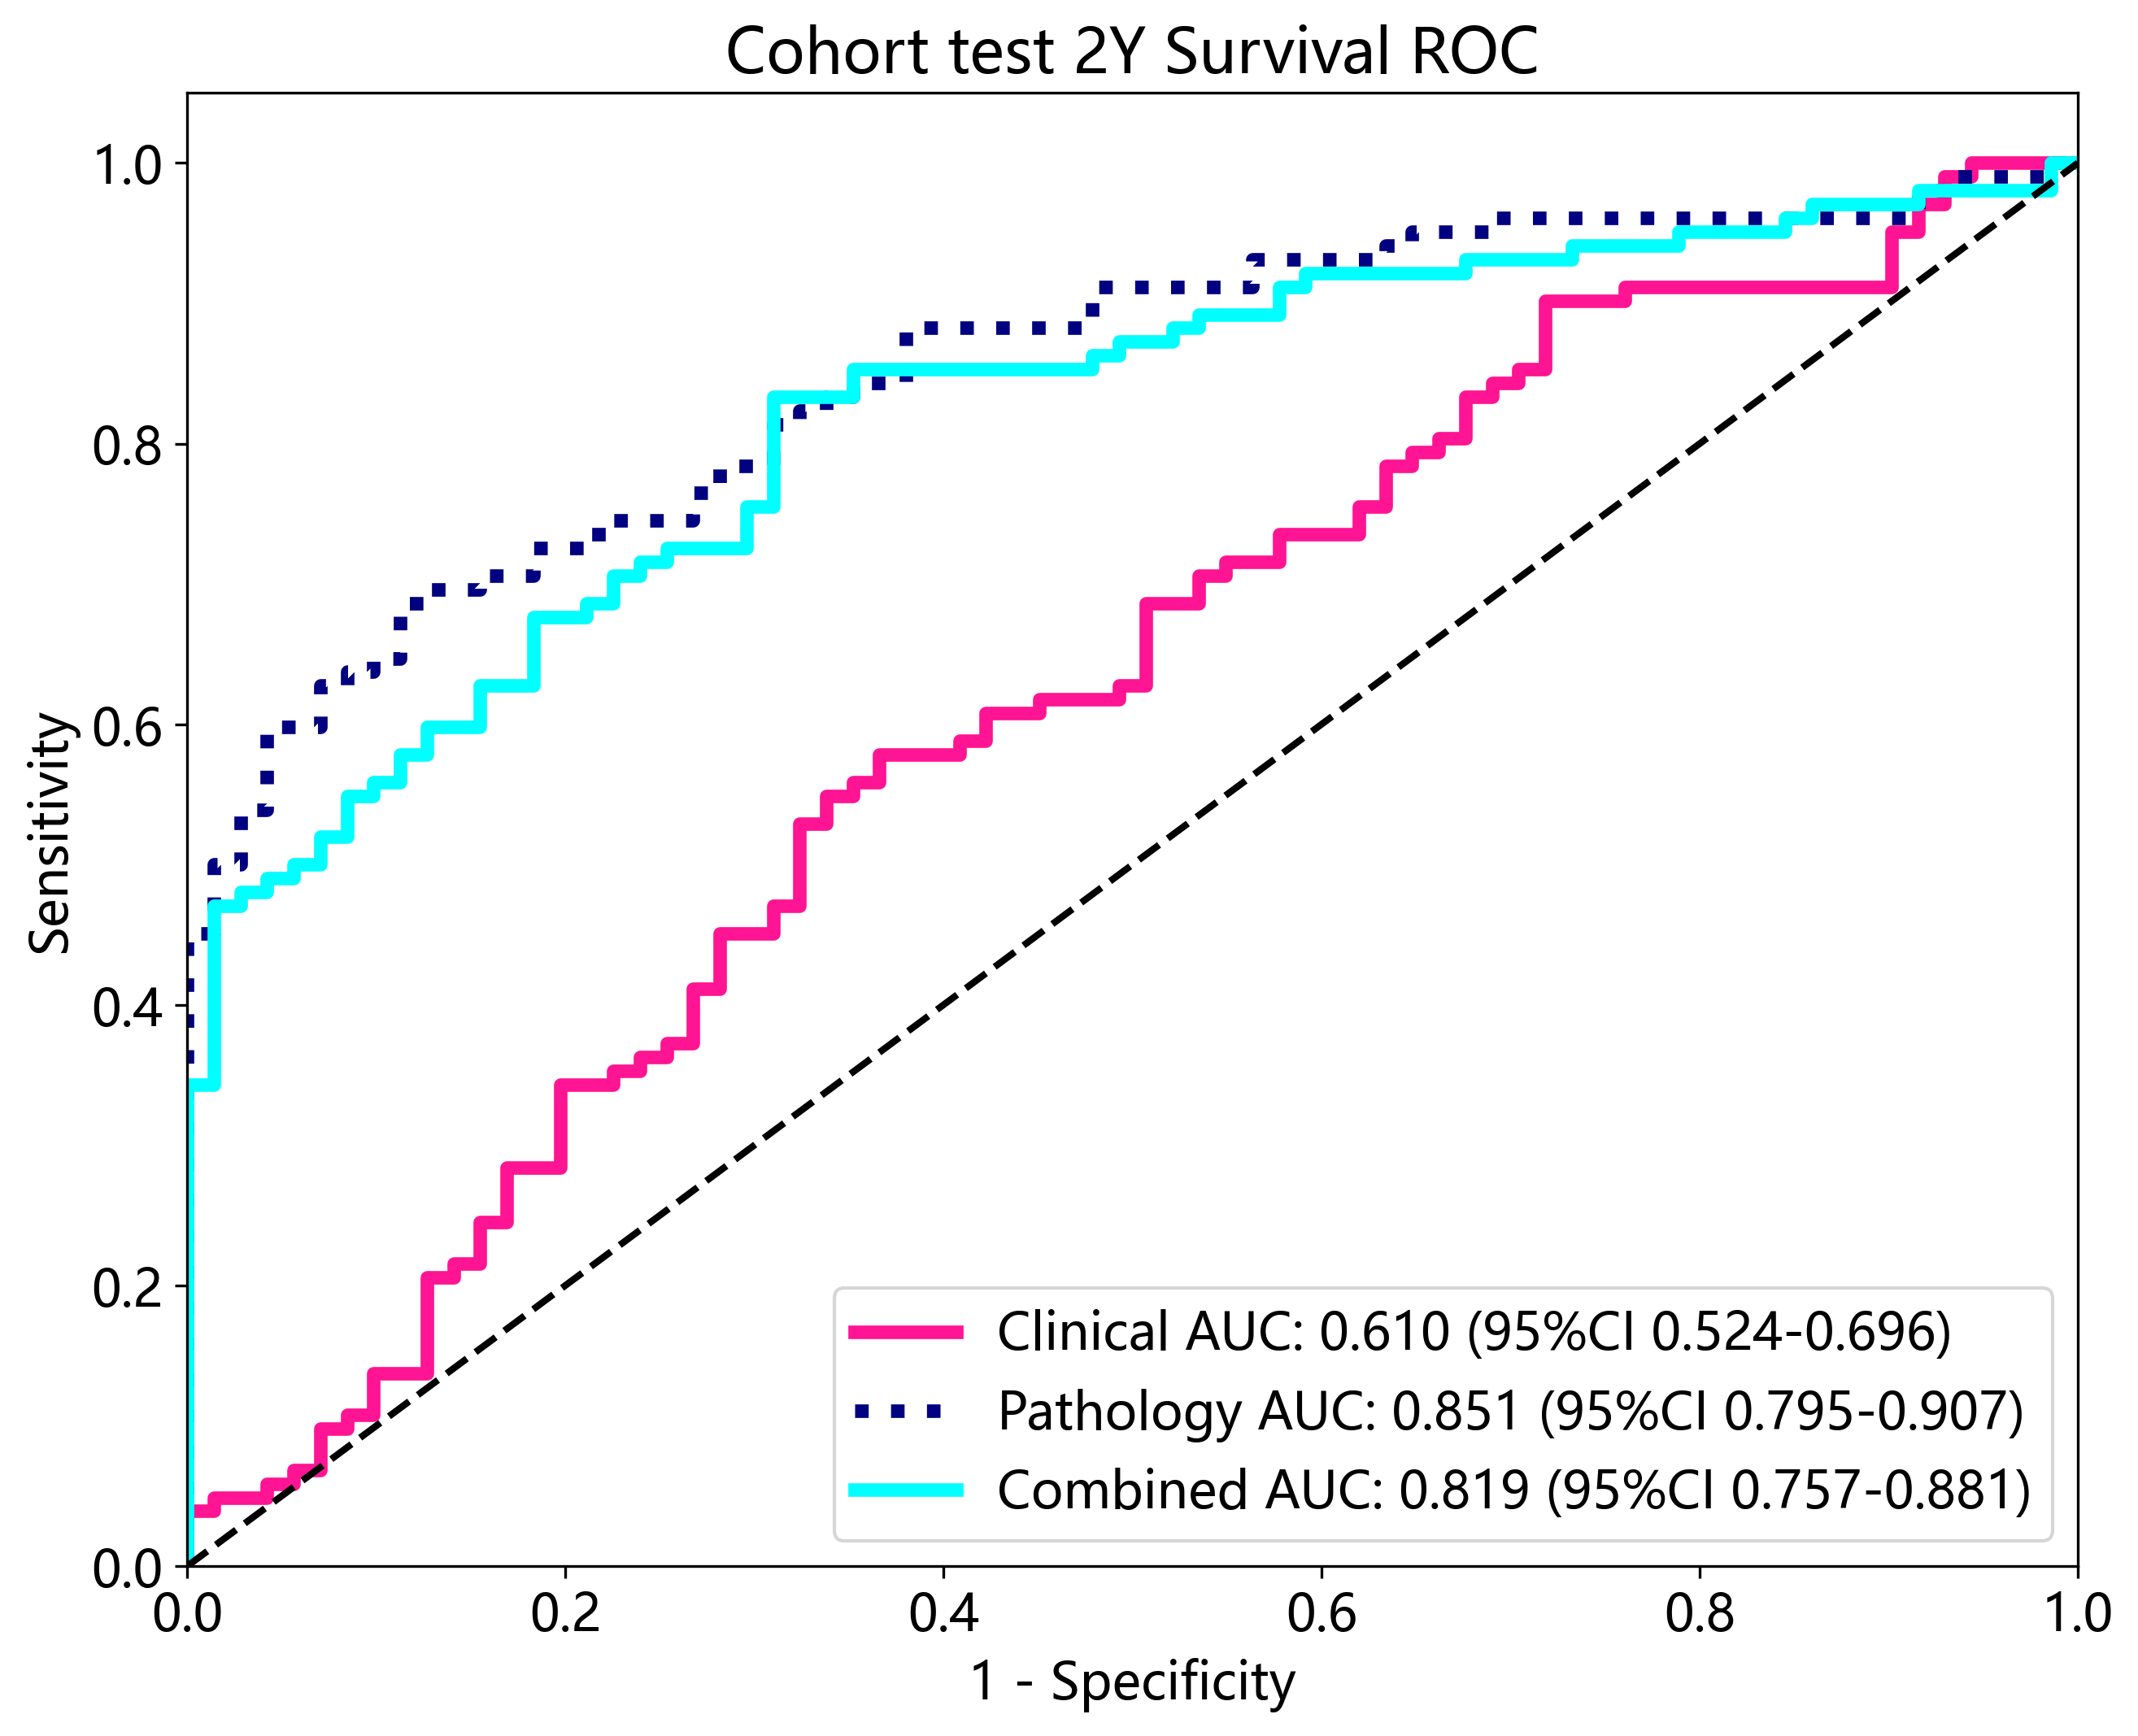

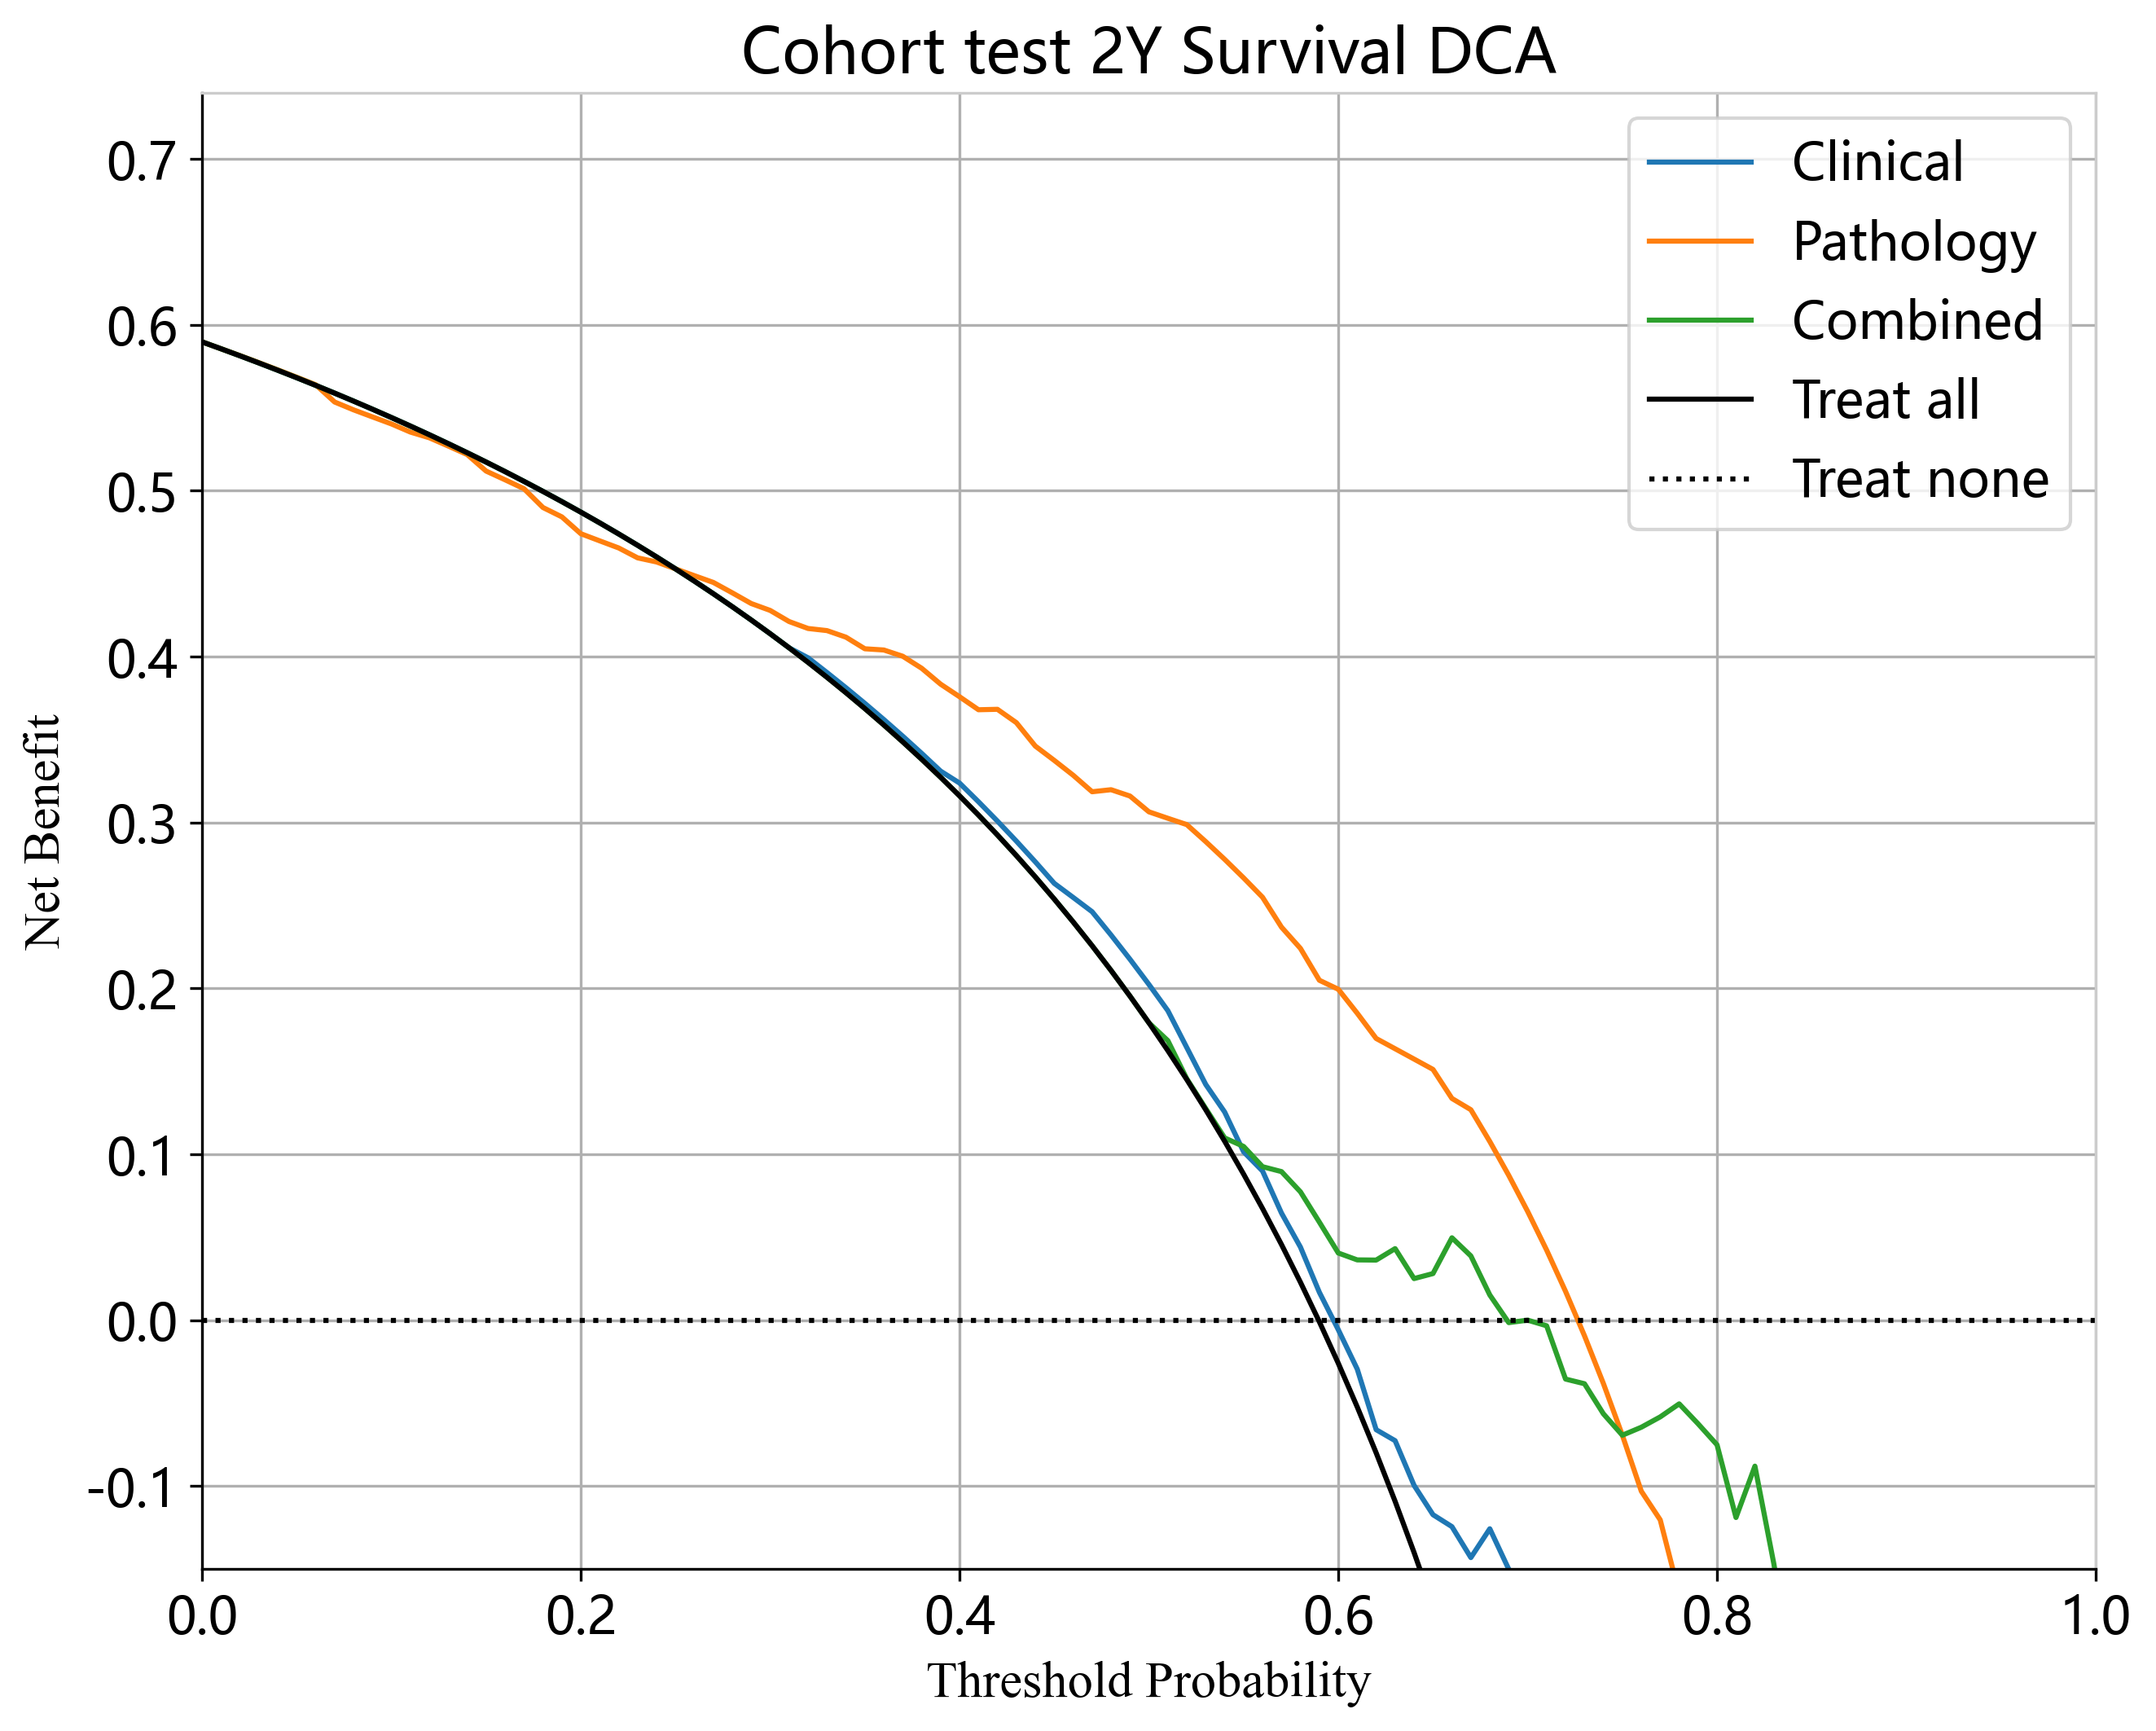

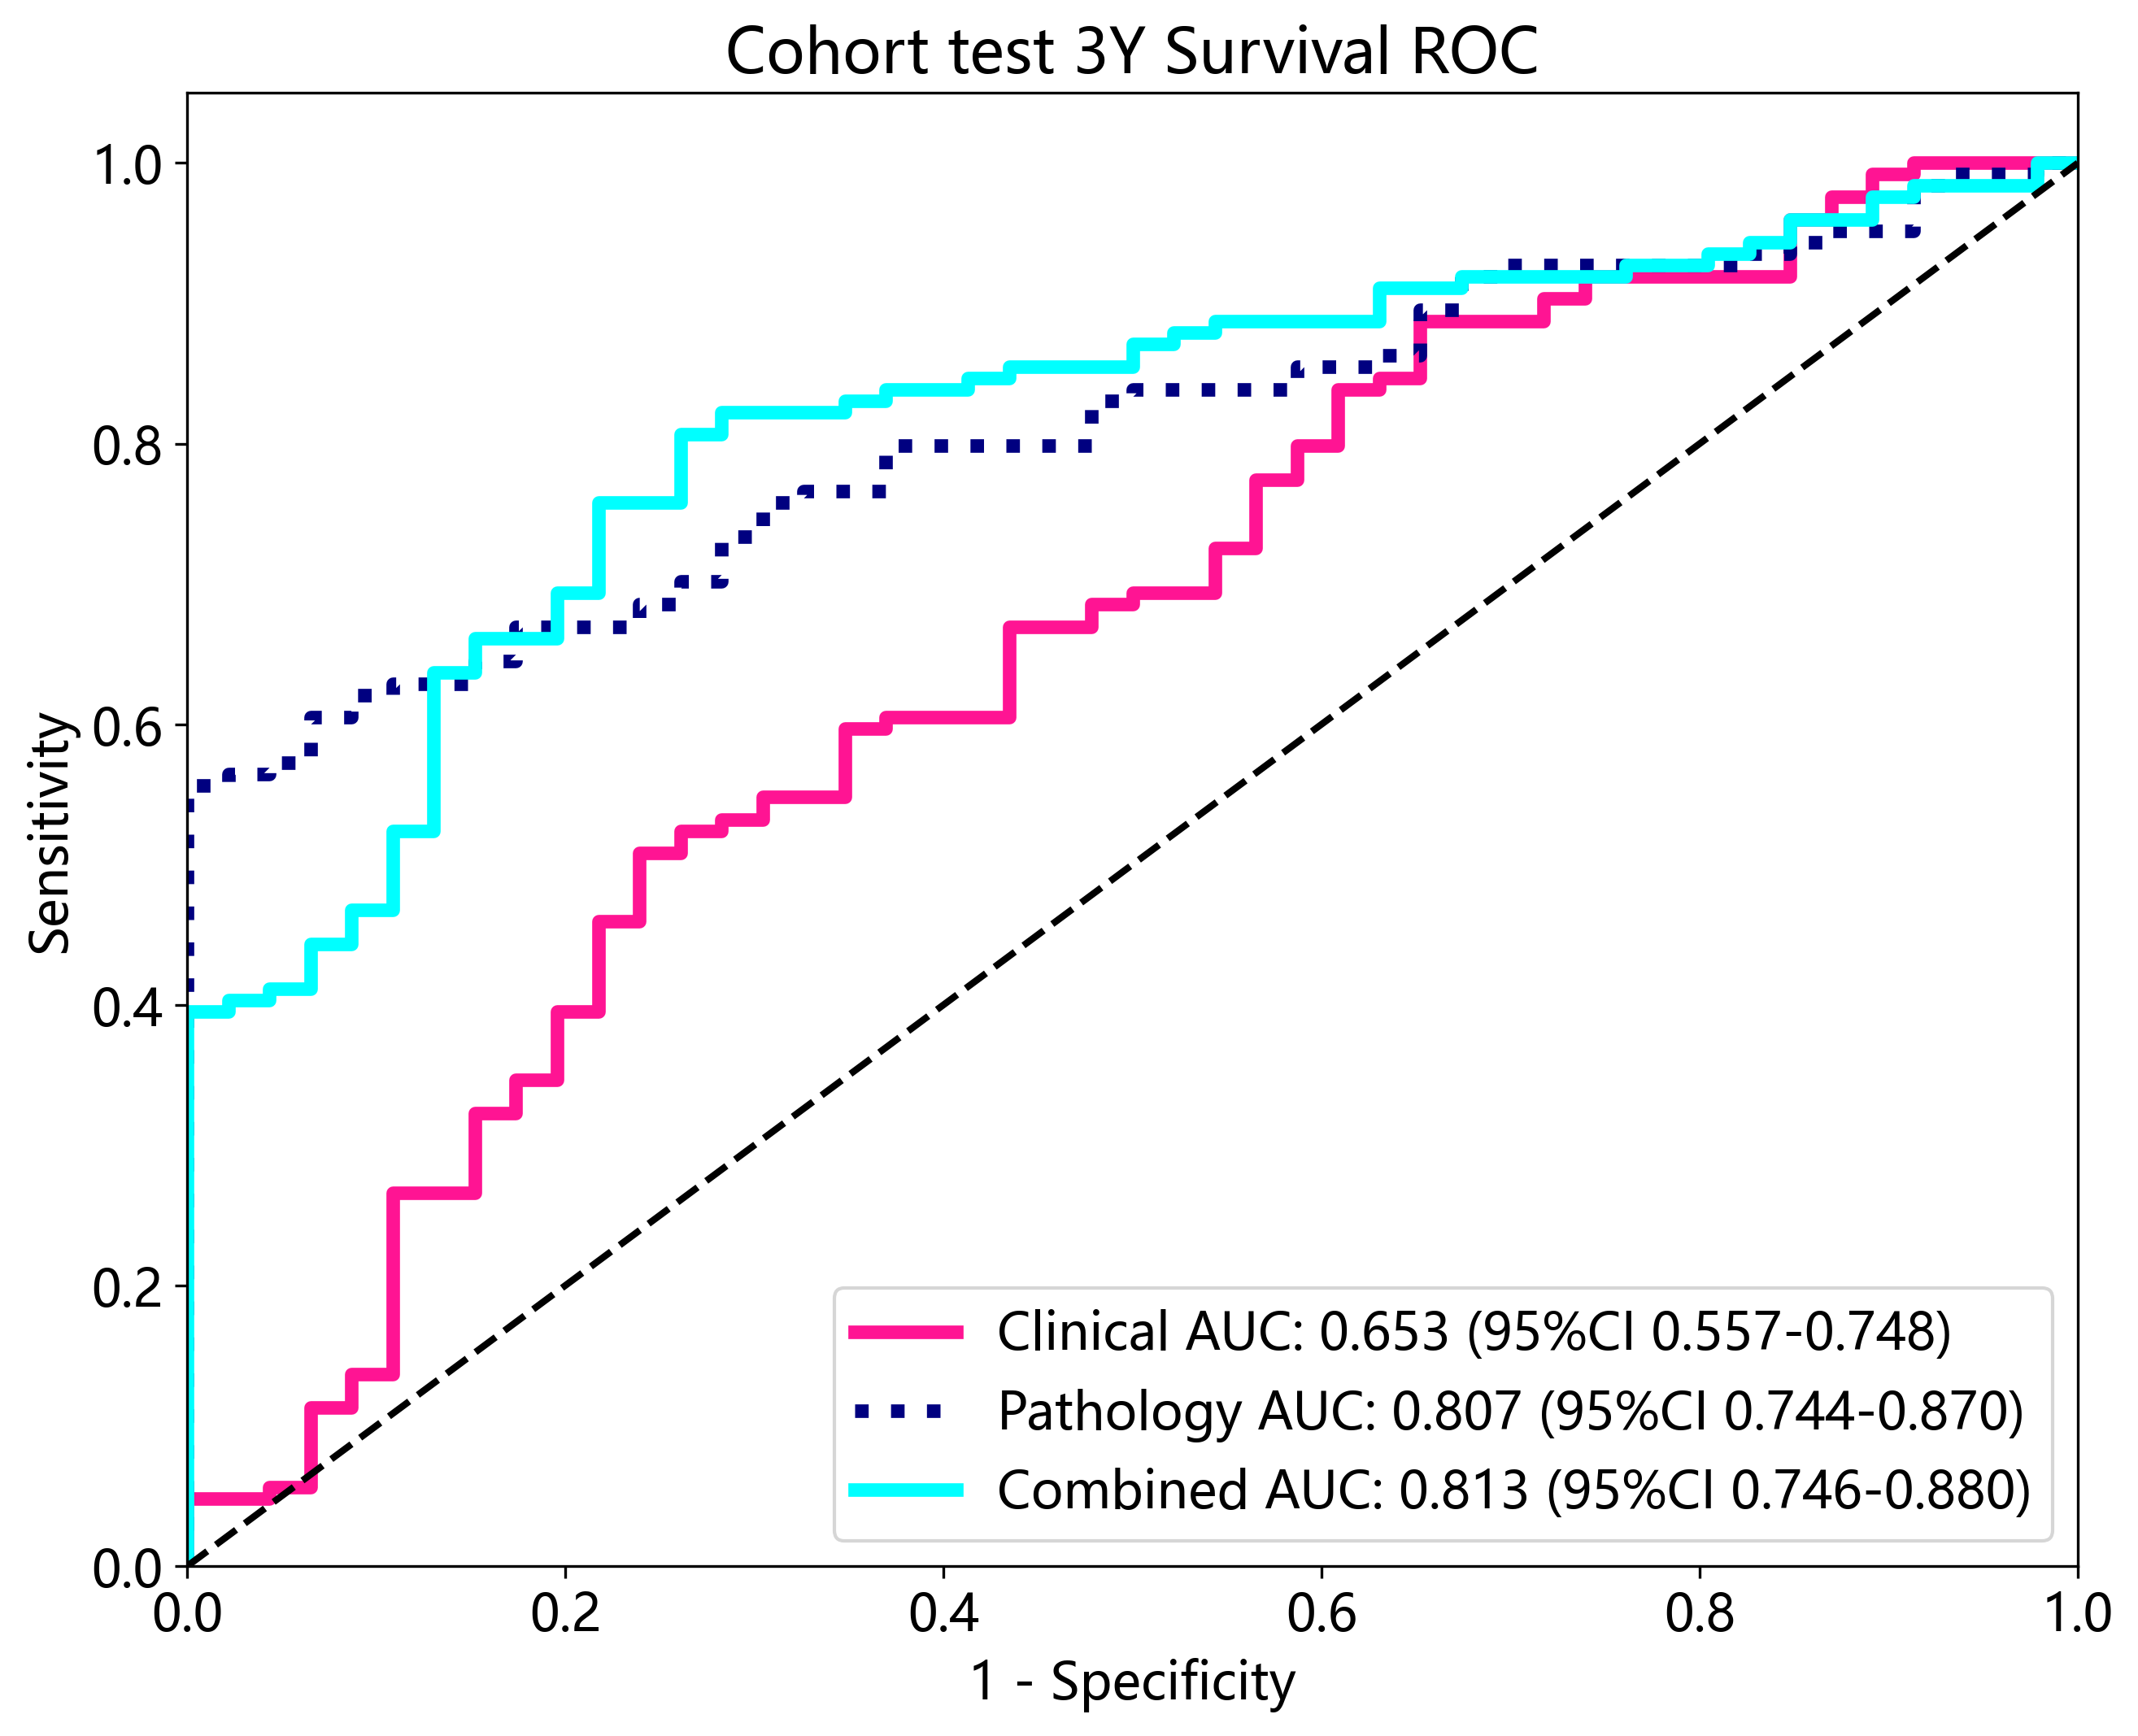

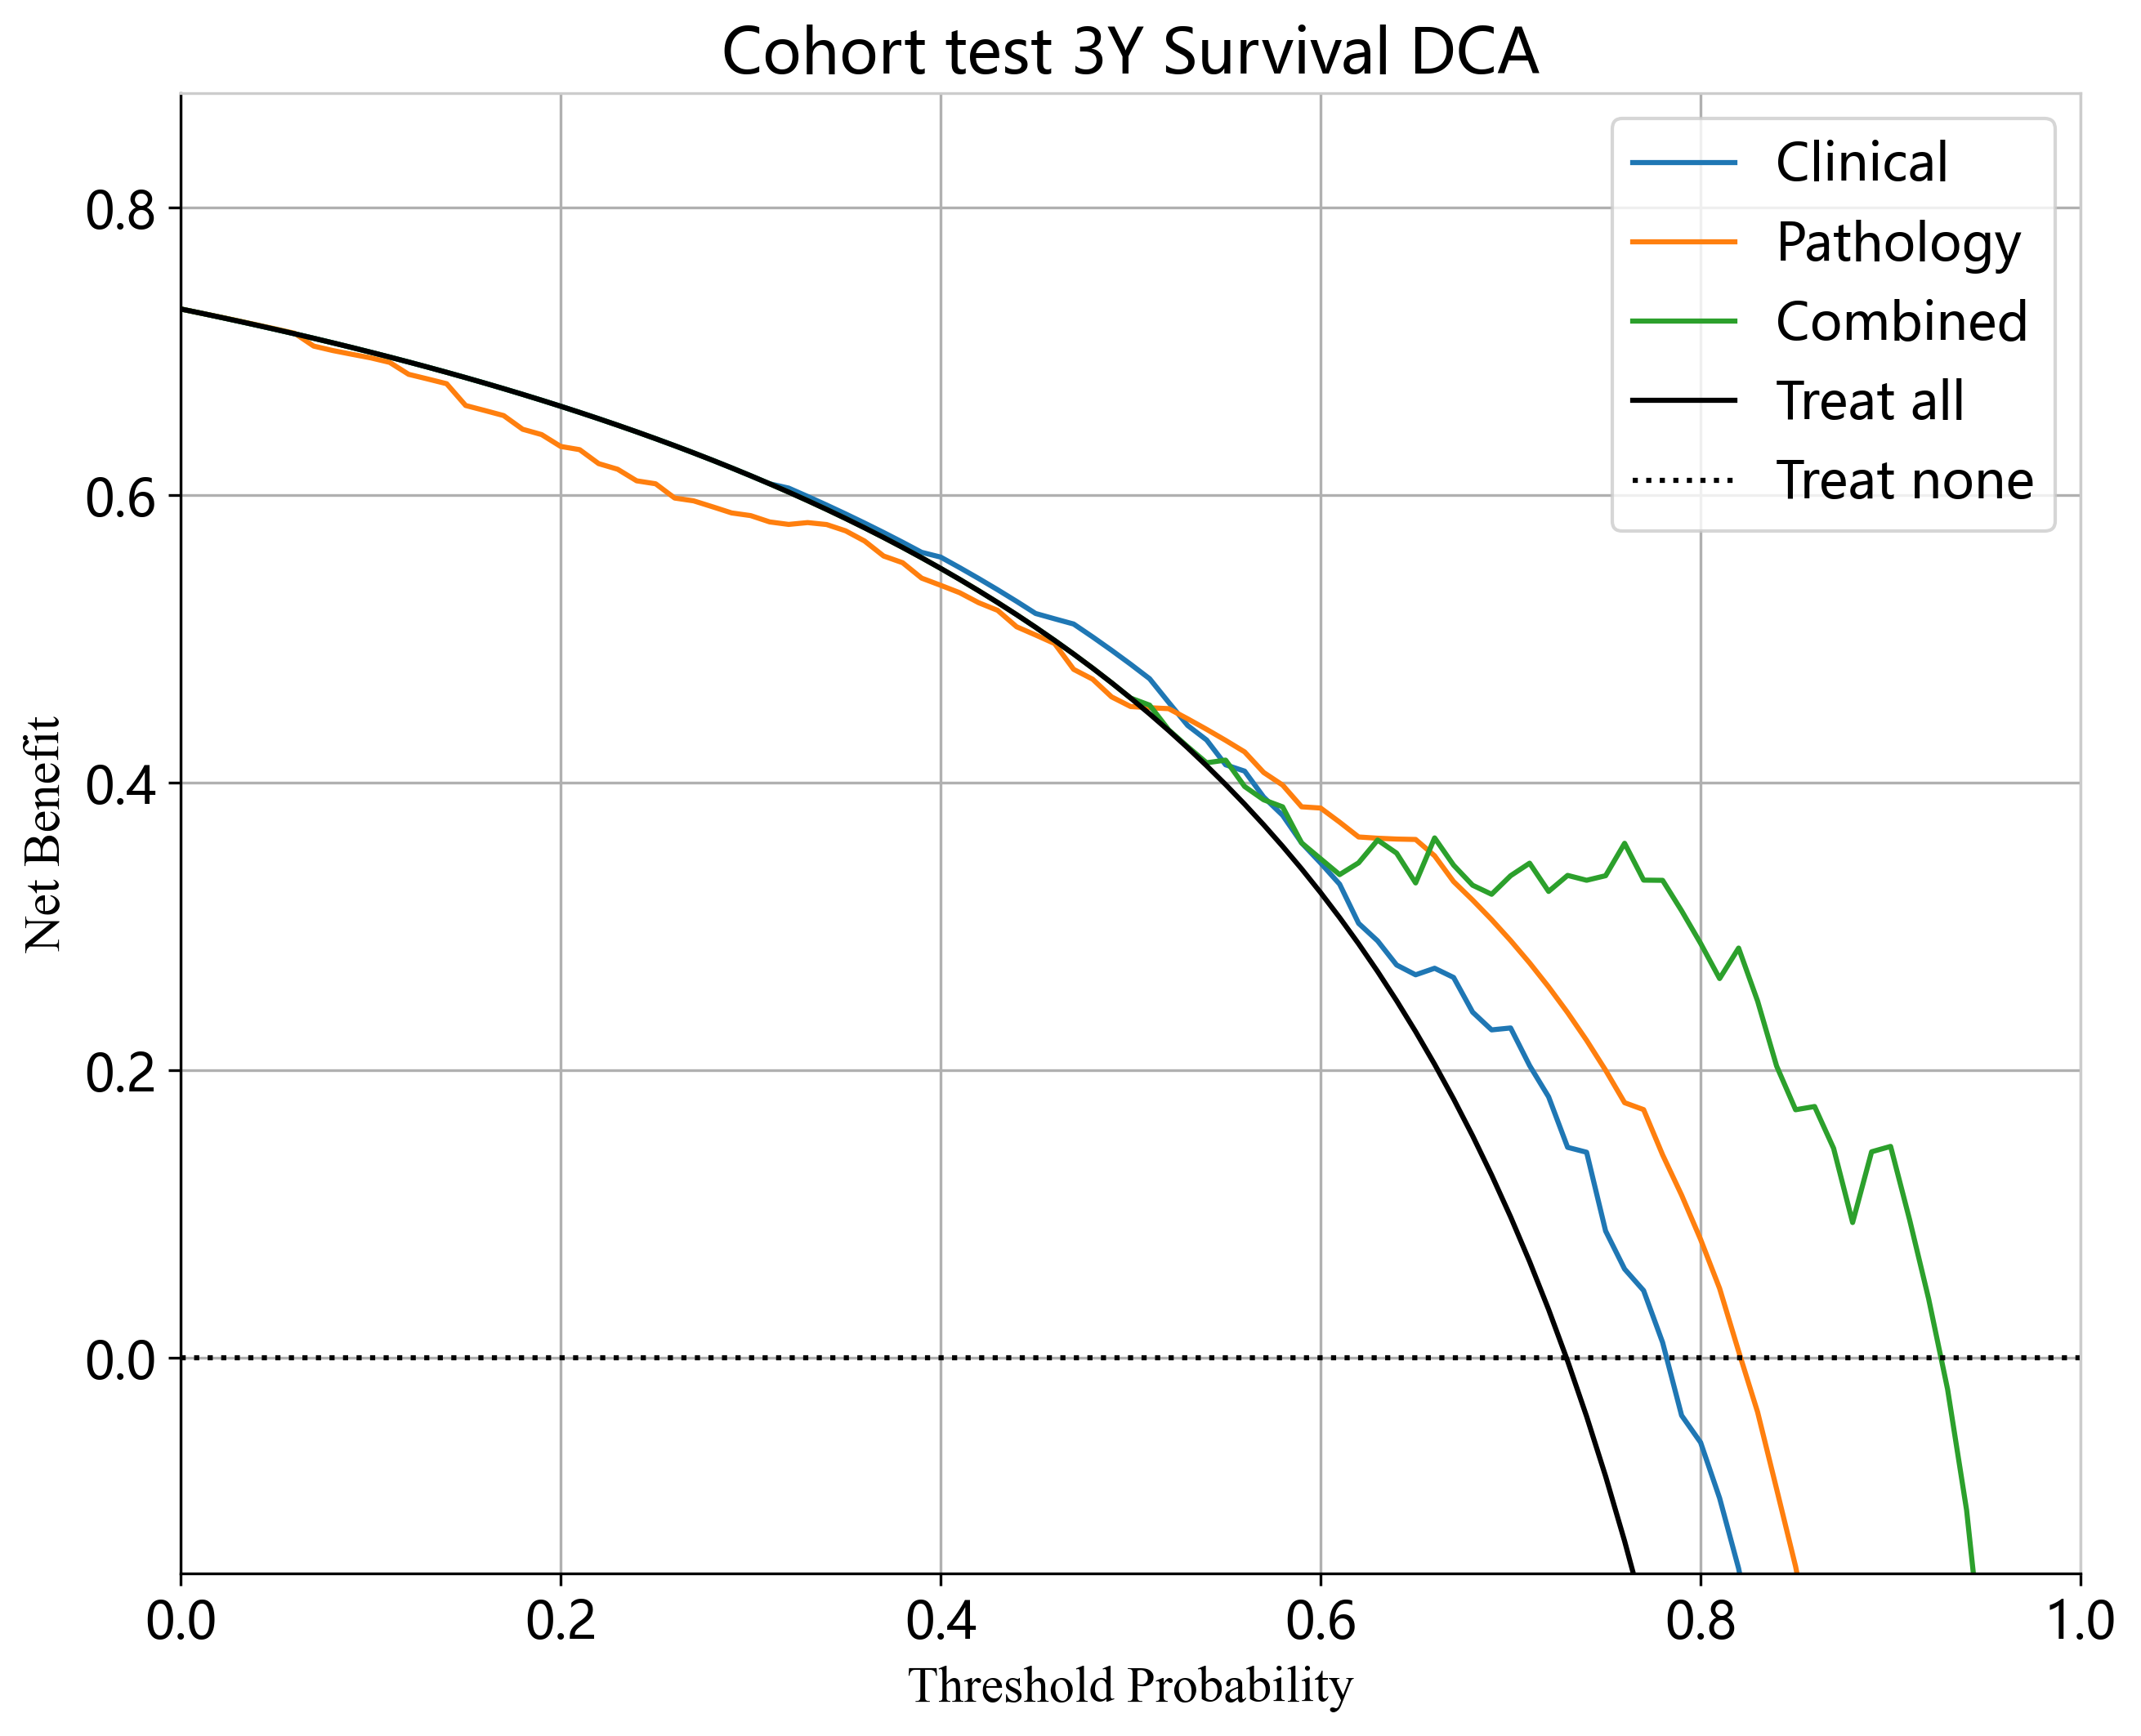

,Signature,Accuracy,AUC,95% CI,Sensitivity,Specificity,PPV,NPV,Survival,Cohort
0,Clinical,0.652,0.703,0.6477 - 0.7578,0.670,0.647,0.366,0.865,1Y Survival,Train
1,Pathology,0.789,0.901,0.8726 - 0.9298,0.925,0.747,0.527,0.970,1Y Survival,Train
2,Combined,0.700,0.877,0.8435 - 0.9104,0.925,0.632,0.434,0.965,1Y Survival,Train
3,Clinical,0.654,0.704,0.6553 - 0.7523,0.665,0.643,0.644,0.664,2Y Survival,Train
4,Pathology,0.888,0.951,0.9333 - 0.9690,0.893,0.882,0.881,0.894,2Y Survival,Train
5,Combined,0.821,0.901,0.8736 - 0.9290,0.805,0.837,0.828,0.815,2Y Survival,Train
6,Clinical,0.638,0.682,0.6273 - 0.7368,0.612,0.709,0.848,0.409,3Y Survival,Train
7,Pathology,0.768,0.874,0.8419 - 0.9056,0.686,0.983,0.991,0.542,3Y Survival,Train
8,Combined,0.732,0.834,0.7948 - 0.8725,0.683,0.863,0.930,0.508,3Y Survival,Train
9,Clinical,0.699,0.644,0.5403 - 0.7486,0.571,0.728,0.328,0.880,1Y Survival,Test


In [10]:
import matplotlib.pyplot as plt
from onekey_algo.custom.components.comp1 import merge_results, draw_roc
from onekey_algo.custom.components.metrics import analysis_pred_binary
from onekey_algo.custom.components.comp1 import draw_calibration
from onekey_algo.custom.components.comp1 import plot_DCA
metric = []
youden = {}

model_names = ['Clinical', 'Pathology', 'Combined']
subset = 'train'

for subset in get_param_in_cwd('subsets'):
    for time, tname in [(1*12, '1Y Survival'), (2*12, '2Y Survival'), (3*12, '3Y Survival')]:
        
        Clinic_results = pd.read_csv(f'results/Clinical_cox_predictions_{subset}.csv', dtype={'ID': str})
        Clinic_results.columns = ['ID', model_names[0], 'expectation']
        Path_results = pd.read_csv(f'results/Path_cox_predictions_{subset}.csv', header=0, dtype={'ID': str})
        Path_results.columns = ['ID', model_names[1], 'expectation']
        Combined_results = pd.read_csv(f'results/Combined_cox_predictions_{subset}.csv', dtype={'ID': str})
        Combined_results.columns = ['ID', model_names[2], 'expectation']

        time_label_data = get_time_dependent_gt(label_data, time=time,  duration_col='OSTime', event_col='OS')
        ALL_results = merge_results(Clinic_results, Path_results, Combined_results, time_label_data)
#         display(ALL_results)
        ALL_results = ALL_results.drop_duplicates('ID')

        gt = [np.array(ALL_results['label']) for _ in model_names]
        pred_train = [np.array(ALL_results[d]) for d in model_names]
        draw_roc(gt, pred_train, labels=model_names, title=f'Cohort {subset} {tname} ROC')
        plt.savefig(f'img/{tname}_{subset}_auc.svg')
        plt.show()
        for mname, y, score in zip(model_names, gt, pred_train):
            # 计算验证集指标
            acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y, score)
            ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
            metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, tname, f"{subset[0].upper() + subset[1:]}"))
            youden[mname] = thres
        
#         draw_calibration(pred_scores=pred_train, n_bins=5, remap=True,
#                          y_test=gt, model_names=model_names)
#         plt.title(f"Cohort {subset} {tname} Calibration")
#         plt.savefig(f'img/{tname.split(" ")}_{subset}_cali.svg')
#         plt.show()
        
        plot_DCA([ALL_results[model_name] for model_name in model_names], 
                 ALL_results['label'], title=f'Cohort {subset} {tname} DCA', labels=model_names, y_min=-0.15)
        plt.savefig(f'img/{tname.split(" ")}_{subset}_dca.svg')
        plt.show()
pd.DataFrame(metric, index=None, columns=['Signature', 'Accuracy', 'AUC', '95% CI', 'Sensitivity', 'Specificity', 
                                          'PPV', 'NPV', 'Survival', 'Cohort'])